#EDA - 1 : Bike Details Dataset



In [2]:
#1. What is the range of selling prices in the dataset?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Replace with the actual file name

# Find the range
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
price_range = max_price - min_price

print(f"Minimum Selling Price: {min_price}")
print(f"Maximum Selling Price: {max_price}")
print(f"Range of Selling Prices: {price_range}")


Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of Selling Prices: 755000


In [3]:
#2. What is the median selling price for bikes in the dataset?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Replace with the actual file name

# Compute the median
median_price = df["selling_price"].median()

print(f"Median Selling Price: {median_price}")


Median Selling Price: 45000.0


In [4]:
#3. What is the most common seller type?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Replace with the actual file name

# Count occurrences of each seller type
most_common_seller = df["seller_type"].value_counts().idxmax()

print(f"Most Common Seller Type: {most_common_seller}")


Most Common Seller Type: Individual


In [5]:
#4. How many bikes have driven more than 50,000 kilometers ?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Replace with the actual file name

# Count bikes with km_driven > 50,000
count_bikes = (df["km_driven"] > 50000).sum()

print(f"Number of bikes driven more than 50,000 km: {count_bikes}")


Number of bikes driven more than 50,000 km: 170


In [6]:
#5. What is the average km_driven value for each ownership type ?

import pandas as pd

# Load the dataset from the given path
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct directory

# Compute the average km_driven for each ownership type
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()

# Display the results
print(avg_km_per_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
#6. What proportion of bikes are from the year 2015 or older?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Count bikes from 2015 or older
bikes_2015_or_older = (df["year"] <= 2015).sum()

# Total number of bikes
total_bikes = len(df)

# Compute proportion
proportion = bikes_2015_or_older / total_bikes

# Display the result as a percentage
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")


Proportion of bikes from 2015 or older: 56.64%


In [10]:
#7. What is the trend of missing values across the dataset?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Count missing values for each column
missing_values = df.isnull().sum()

# Compute the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a summary table
missing_summary = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})

# Display only columns with missing values
print(missing_summary[missing_summary["Missing Values"] > 0])


                   Missing Values  Percentage
ex_showroom_price             435   40.999057


In [11]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Find the highest ex_showroom_price
max_price = df["ex_showroom_price"].max()

# Get the bike(s) with this highest price
bike_with_max_price = df[df["ex_showroom_price"] == max_price][["name", "ex_showroom_price"]]

# Display the result
print(bike_with_max_price)


                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [12]:
#9. What is the total number of bikes listed by each seller type?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Count the number of listings per seller type
seller_counts = df["seller_type"].value_counts()

# Display the result
print(seller_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


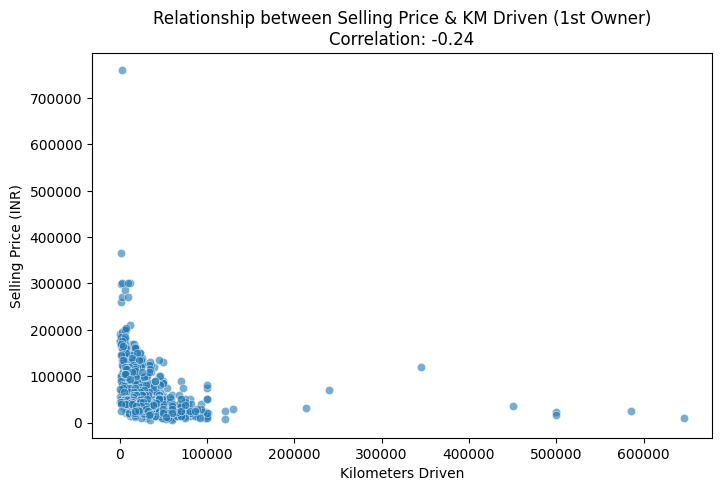

Correlation between Selling Price and KM Driven for First-Owner Bikes: -0.24


In [13]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Filter for first-owner bikes
first_owner_bikes = df[df["owner"] == "1st owner"]

# Compute correlation
correlation = first_owner_bikes["selling_price"].corr(first_owner_bikes["km_driven"])

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=first_owner_bikes, x="km_driven", y="selling_price", alpha=0.6)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.title(f"Relationship between Selling Price & KM Driven (1st Owner)\nCorrelation: {correlation:.2f}")
plt.show()

# Print correlation value
print(f"Correlation between Selling Price and KM Driven for First-Owner Bikes: {correlation:.2f}")


In [14]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Compute Q1, Q3, and IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Display the number of removed outliers
outliers_removed = len(df) - len(df_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")




Number of outliers removed: 39


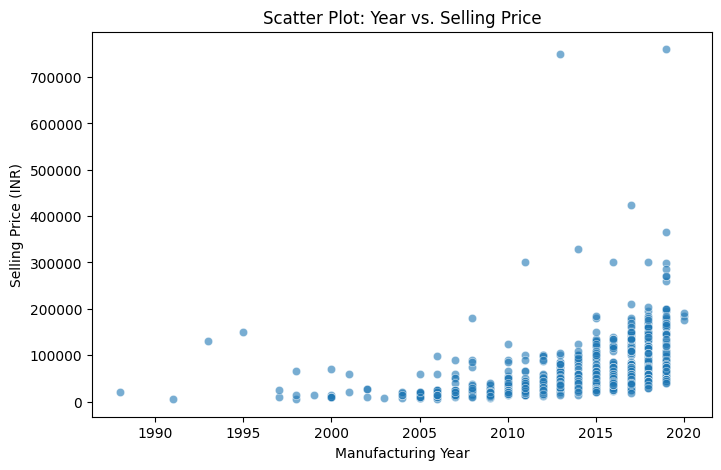

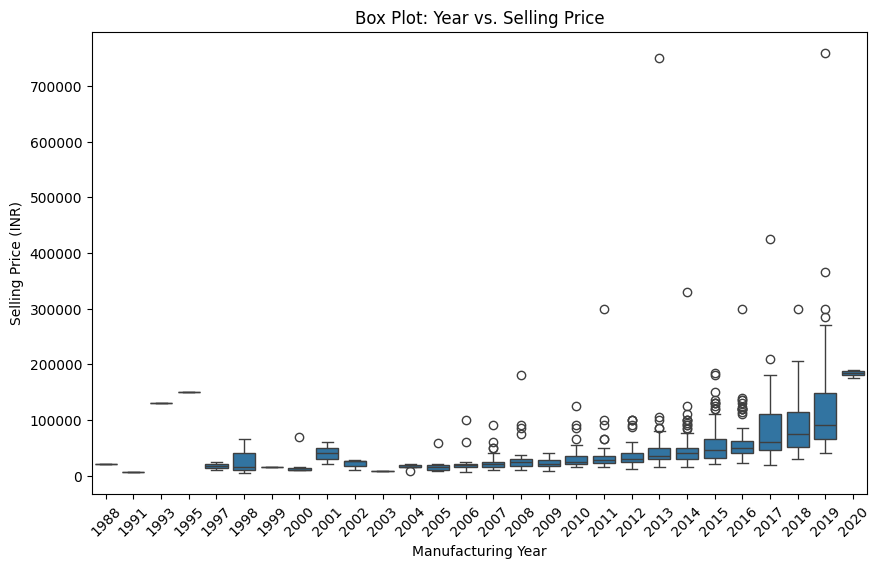

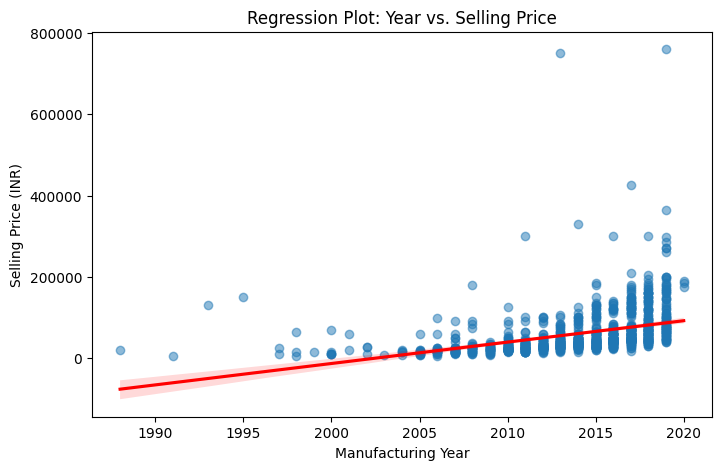

In [15]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.6)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.title("Scatter Plot: Year vs. Selling Price")
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="year", y="selling_price")
plt.xticks(rotation=45)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.title("Box Plot: Year vs. Selling Price")
plt.show()

# Regression plot
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="year", y="selling_price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.title("Regression Plot: Year vs. Selling Price")
plt.show()


In [16]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Define the current year
current_year = 2025  # Adjust based on the actual year of analysis

# Calculate bike age
df["bike_age"] = current_year - df["year"]

# Compute the average selling price for each bike age
avg_depreciation = df.groupby("bike_age")["selling_price"].mean().reset_index()

# Display results
print(avg_depreciation)


    bike_age  selling_price
0          5  183333.333333
1          6  119689.511628
2          7   87660.374046
3          8   78894.736842
4          9   58469.018692
5         10   56500.000000
6         11   48668.131868
7         12   51136.986301
8         13   35748.400000
9         14   35655.721311
10        15   31793.333333
11        16   22267.857143
12        17   34289.285714
13        18   24927.586207
14        19   23380.000000
15        20   16978.571429
16        21   15100.000000
17        22    8000.000000
18        23   20666.666667
19        24   40000.000000
20        25   20833.333333
21        26   15000.000000
22        27   28333.333333
23        28   17500.000000
24        30  150000.000000
25        32  130000.000000
26        34    6000.000000
27        37   20000.000000


In [17]:
#14. Which bike names are priced significantly above the average price for their manufacturing year ?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Compute the average selling price for each manufacturing year
avg_price_per_year = df.groupby("year")["selling_price"].mean()

# Merge this data back to the original dataset
df = df.merge(avg_price_per_year, on="year", suffixes=("", "_avg_year"))

# Define the threshold for "significantly above average" (e.g., 1.5x the average)
threshold_multiplier = 1.5
df["above_avg_threshold"] = df["selling_price_avg_year"] * threshold_multiplier

# Filter bikes that are priced significantly above the average for their manufacturing year
overpriced_bikes = df[df["selling_price"] > df["above_avg_threshold"]][["name", "year", "selling_price", "selling_price_avg_year"]]

# Display the results
print(overpriced_bikes)


                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     selling_price_avg_year  
2              87660.374046  
7              34289.285714  
13            119689.511628  
18             87660.374046  
23            119689.511628  
..                      ...

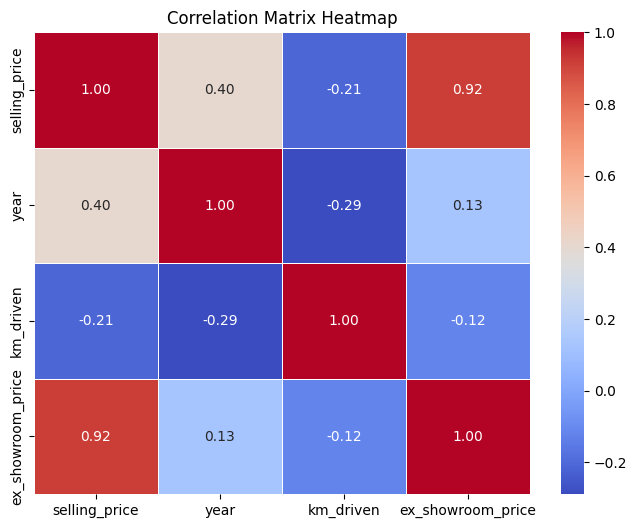

In [18]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")  # Ensure the file is in the correct location

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


#EDA - 1 : Car Sale Dataset

                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

<ipython-input-20-6c2b214d11af>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dealer_avg_price, x="Dealer_Name", y="Price ($)", palette="coolwarm")


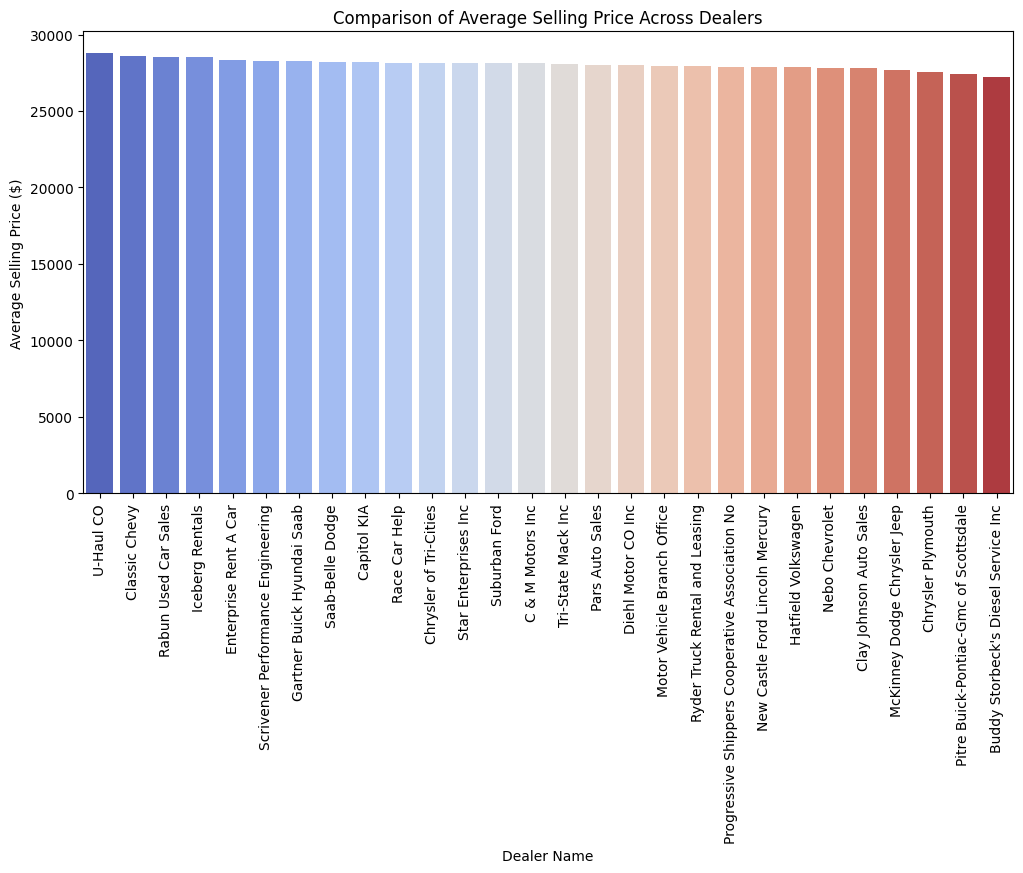

In [20]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure the correct file path

# Group by dealer and compute average selling price
dealer_avg_price = df.groupby("Dealer_Name")["Price ($)"].mean().reset_index()

# Sort by average price in descending order
dealer_avg_price = dealer_avg_price.sort_values(by="Price ($)", ascending=False)

# Display the top dealers by average selling price
print(dealer_avg_price)

# Visualization: Bar chart for comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=dealer_avg_price, x="Dealer_Name", y="Price ($)", palette="coolwarm")
plt.xticks(rotation=90)  # Rotate dealer names for better visibility
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price ($)")
plt.title("Comparison of Average Selling Price Across Dealers")
plt.show()


       Company     Price ($)
15     Lincoln  19658.050211
24        Saab  19653.740089
4     Cadillac  19517.120220
21    Plymouth  19065.997338
14       Lexus  17852.923492
3        Buick  17142.232626
17     Mercury  16445.172195
19      Nissan  16214.264017
25      Saturn  15990.223671
8         Ford  15849.090227
16  Mercedes-B  15722.807459
20  Oldsmobile  15711.345857
27      Toyota  15367.131714
2          BMW  15065.578723
22     Pontiac  14348.963592
11    Infiniti  13696.332844
5    Chevrolet  13311.063223
29       Volvo  12933.790185
26      Subaru  12920.771620
1         Audi  12904.243867
28  Volkswagen  12527.124011
18  Mitsubishi  11671.343035
6     Chrysler  11583.286811
7        Dodge  11187.592085
9        Honda  11148.629062
12      Jaguar  10222.531533
13        Jeep   9459.834418
0        Acura   8183.046414
23     Porsche   5261.839206
10     Hyundai   3485.982649


<ipython-input-22-4c0ec07dc730>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_price_variation, x="Company", y="Price ($)", palette="coolwarm")


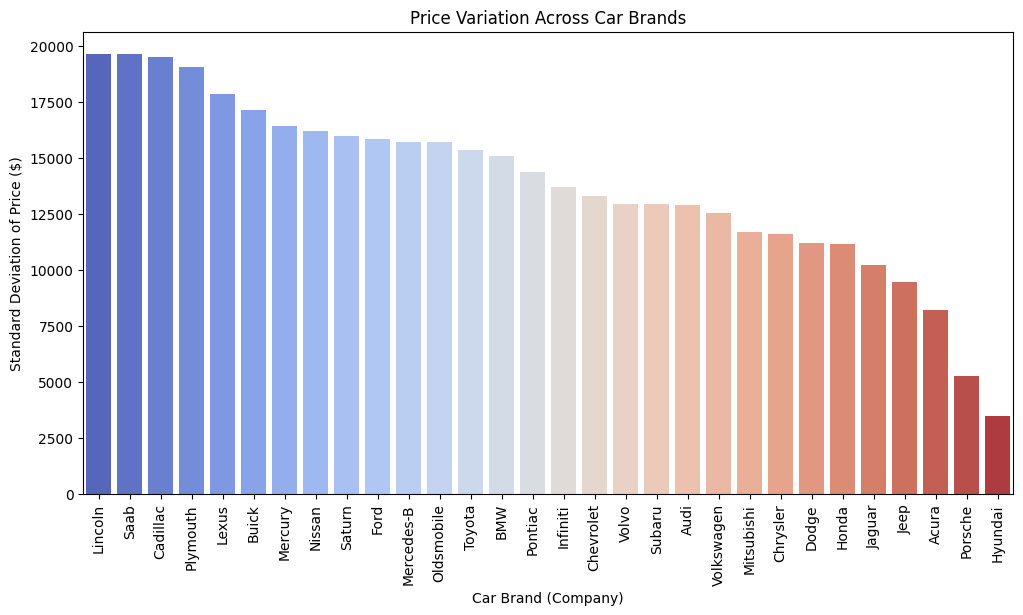

In [22]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure the correct file path

# Group by company and compute standard deviation of selling price
brand_price_variation = df.groupby("Company")["Price ($)"].std().reset_index()

# Sort by highest variation in descending order
brand_price_variation = brand_price_variation.sort_values(by="Price ($)", ascending=False)

# Display the top brands with the highest price variation
print(brand_price_variation)

# Visualization: Bar chart for comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_price_variation, x="Company", y="Price ($)", palette="coolwarm")
plt.xticks(rotation=90)  # Rotate brand names for better visibility
plt.xlabel("Car Brand (Company)")
plt.ylabel("Standard Deviation of Price ($)")
plt.title("Price Variation Across Car Brands")
plt.show()


                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


<ipython-input-23-a7bf21a9916c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="coolwarm")


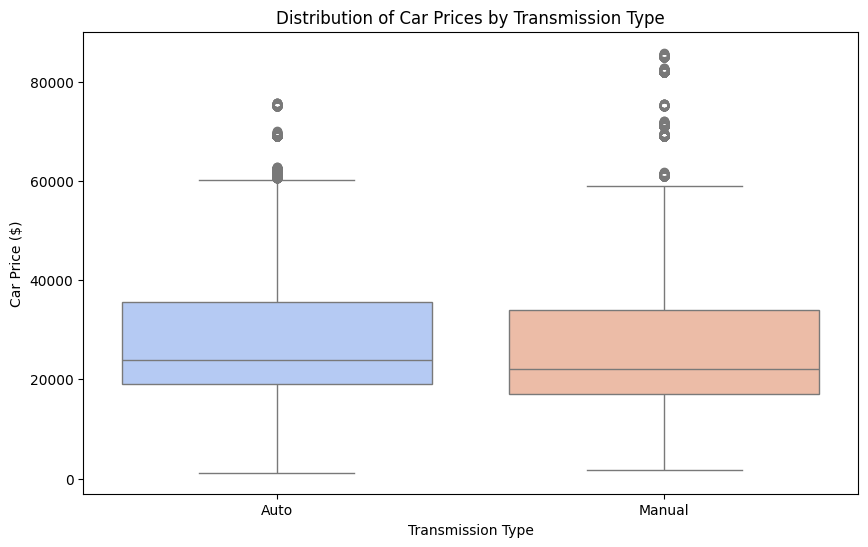

In [23]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure the correct file path

# Summary statistics for price distribution by transmission type
transmission_summary = df.groupby("Transmission")["Price ($)"].describe()
print(transmission_summary)

# Visualization: Box plot for price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="coolwarm")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()


                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

<ipython-input-24-04ed3f2b69db>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="coolwarm")


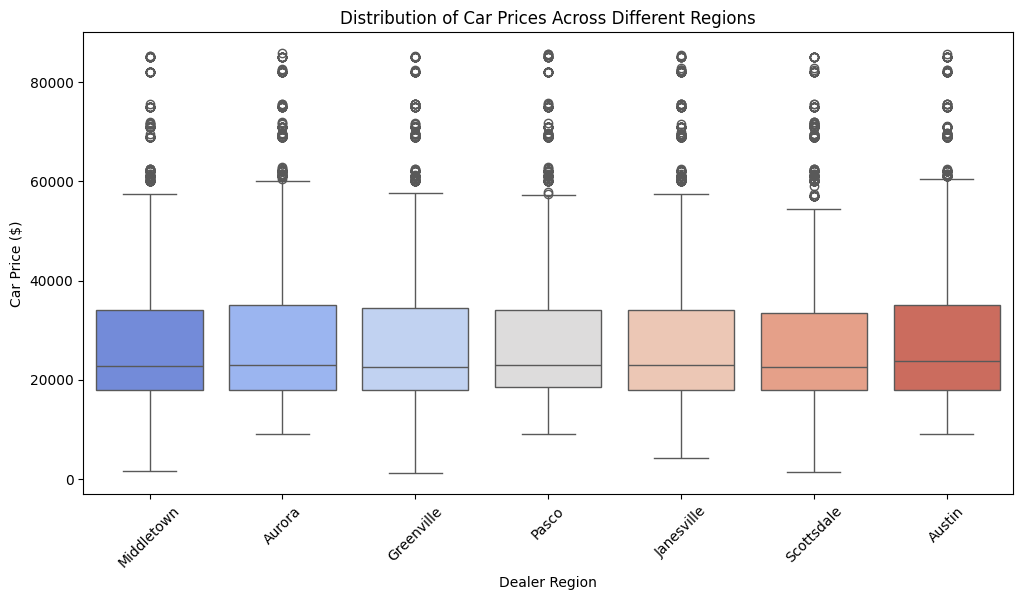

In [24]:
#4. What is the distribution of car prices across different regions?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Summary statistics for price distribution by region
region_summary = df.groupby("Dealer_Region")["Price ($)"].describe()
print(region_summary)

# Visualization: Box plot for price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="coolwarm")
plt.xlabel("Dealer Region")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)  # Rotate region labels for better readability
plt.show()


Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


<ipython-input-25-29af113c811c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette="coolwarm")


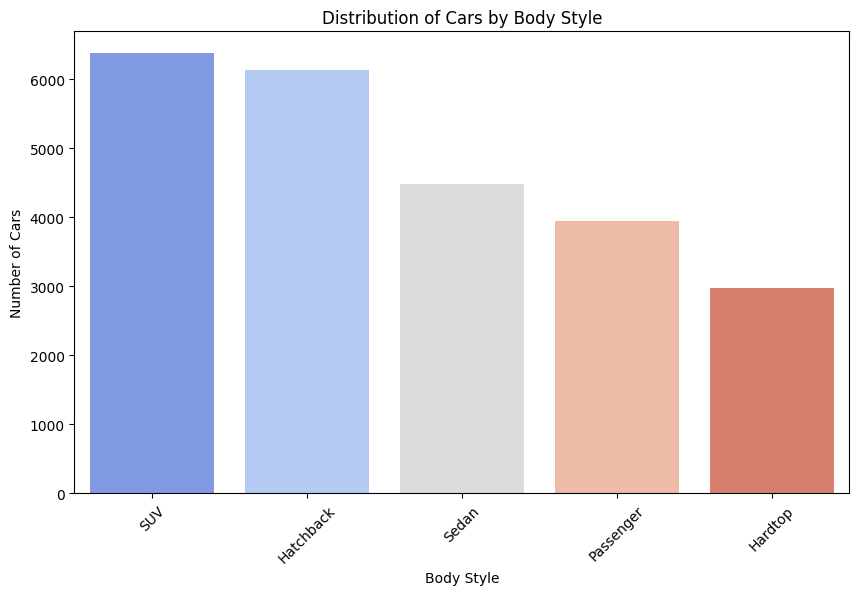

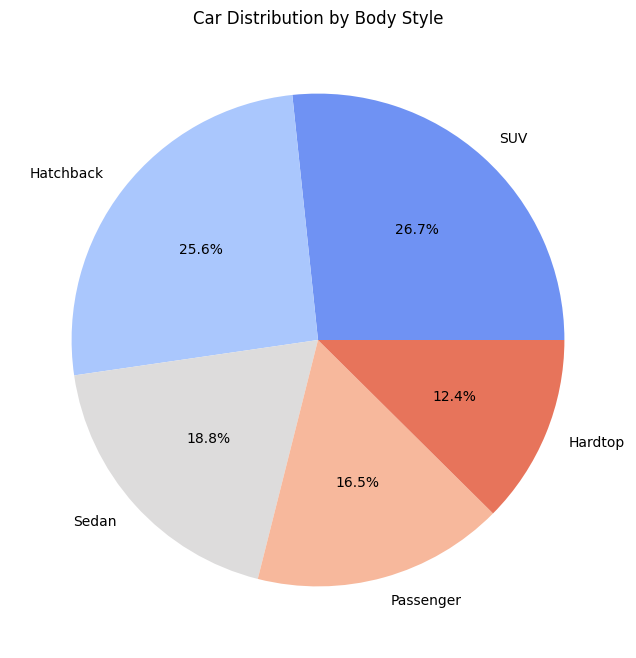

In [25]:
#5. What is the distribution of cars based on body styles?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Count the number of cars by body style
body_style_counts = df["Body Style"].value_counts()

# Display the counts
print(body_style_counts)

# Visualization: Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette="coolwarm")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

# Optional: Pie chart for a different perspective
plt.figure(figsize=(8, 8))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(body_style_counts)))
plt.title("Car Distribution by Body Style")
plt.show()


   Gender     Price ($)
0  Female  28277.265270
1    Male  28039.429407


<ipython-input-26-85805587615f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_price_avg, x="Gender", y="Price ($)", palette="coolwarm")


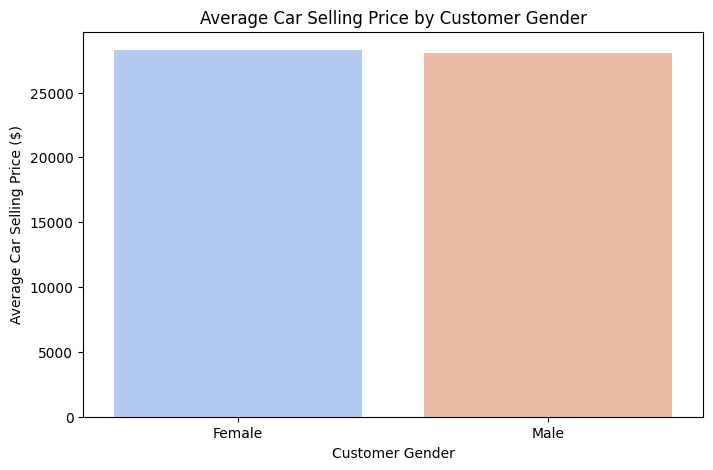

<ipython-input-26-85805587615f>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_price_avg = df.groupby(["Income Group", "Gender"])["Price ($)"].mean().reset_index()


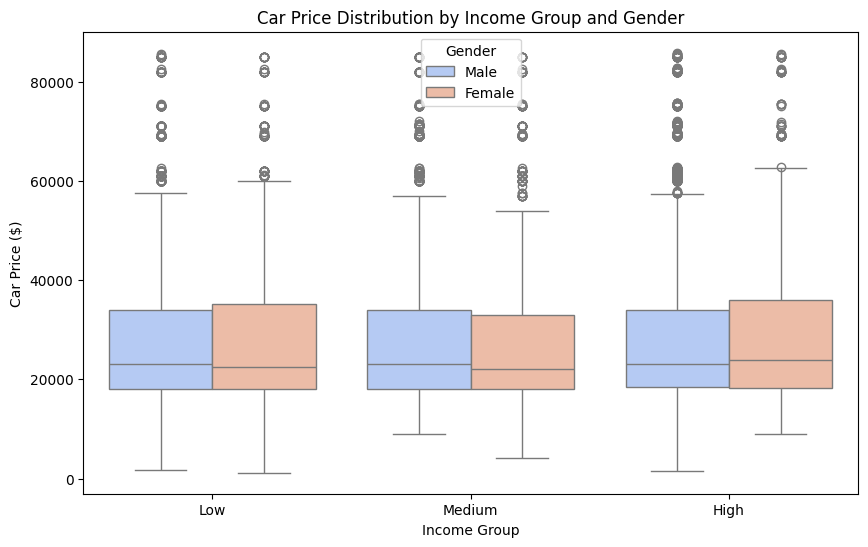

In [26]:
#6. How does the average selling price of cars vary by customer gender and annual income ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Group by Gender and compute average selling price
gender_price_avg = df.groupby("Gender")["Price ($)"].mean().reset_index()
print(gender_price_avg)

# Visualization: Bar chart for gender-wise price comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_price_avg, x="Gender", y="Price ($)", palette="coolwarm")
plt.xlabel("Customer Gender")
plt.ylabel("Average Car Selling Price ($)")
plt.title("Average Car Selling Price by Customer Gender")
plt.show()

# Divide Annual Income into bins (Low, Medium, High)
df["Income Group"] = pd.qcut(df["Annual Income"], q=3, labels=["Low", "Medium", "High"])

# Group by Income Group and Gender to compute average price
income_price_avg = df.groupby(["Income Group", "Gender"])["Price ($)"].mean().reset_index()

# Visualization: Box plot for price distribution by Income Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Income Group", y="Price ($)", hue="Gender", palette="coolwarm")
plt.xlabel("Income Group")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Income Group and Gender")
plt.legend(title="Gender")
plt.show()


                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

<ipython-input-27-1718ef675c34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="coolwarm")


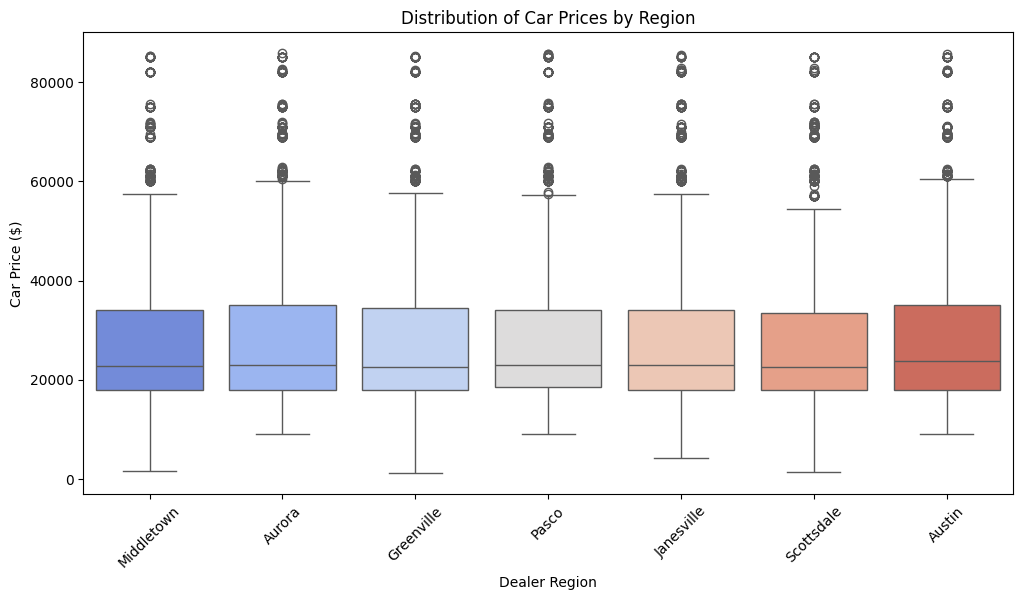

<ipython-input-27-1718ef675c34>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="Dealer_Region", y="Number of Cars Sold", palette="coolwarm")


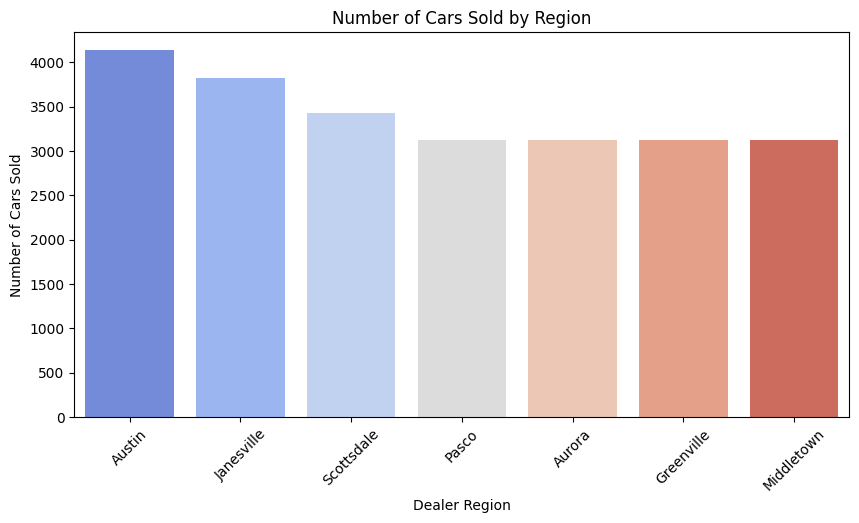

In [27]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Count the number of cars sold per region
region_sales = df["Dealer_Region"].value_counts().reset_index()
region_sales.columns = ["Dealer_Region", "Number of Cars Sold"]

# Summary statistics for price distribution by region
region_price_summary = df.groupby("Dealer_Region")["Price ($)"].describe()
print(region_price_summary)

# Visualization: Box plot for price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="coolwarm")
plt.xlabel("Dealer Region")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Region")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

# Visualization: Bar chart for number of cars sold by region
plt.figure(figsize=(10, 5))
sns.barplot(data=region_sales, x="Dealer_Region", y="Number of Cars Sold", palette="coolwarm")
plt.xlabel("Dealer Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold by Region")
plt.xticks(rotation=45)
plt.show()


['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631


<ipython-input-28-30524838abde>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engine_price_avg, x="Engine", y="Price ($)", palette="coolwarm")


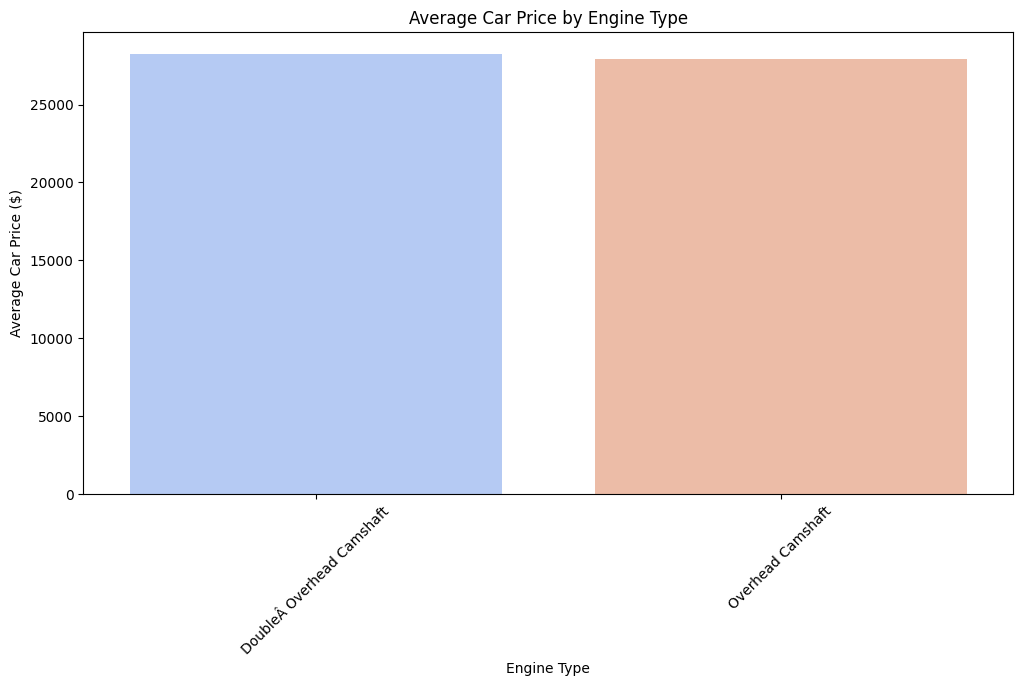

In [28]:
#8. How does the average car price differ between cars with different engine sizes ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Check unique engine types
print(df["Engine"].unique())

# Group by Engine type and compute the average price
engine_price_avg = df.groupby("Engine")["Price ($)"].mean().reset_index()

# Sort values for better visualization
engine_price_avg = engine_price_avg.sort_values(by="Price ($)", ascending=False)

# Display the average price per engine type
print(engine_price_avg)

# Visualization: Bar chart for price comparison by engine type
plt.figure(figsize=(12, 6))
sns.barplot(data=engine_price_avg, x="Engine", y="Price ($)", palette="coolwarm")
plt.xlabel("Engine Type")
plt.ylabel("Average Car Price ($)")
plt.title("Average Car Price by Engine Type")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


  Income Bracket     Price ($)
0            Low  28070.451957
1         Medium  27923.004637
2           High  28277.833815


<ipython-input-29-7d543db29da0>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_price_avg = df.groupby("Income Bracket")["Price ($)"].mean().reset_index()
<ipython-input-29-7d543db29da0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_price_avg, x="Income Bracket", y="Price ($)", palette="coolwarm")


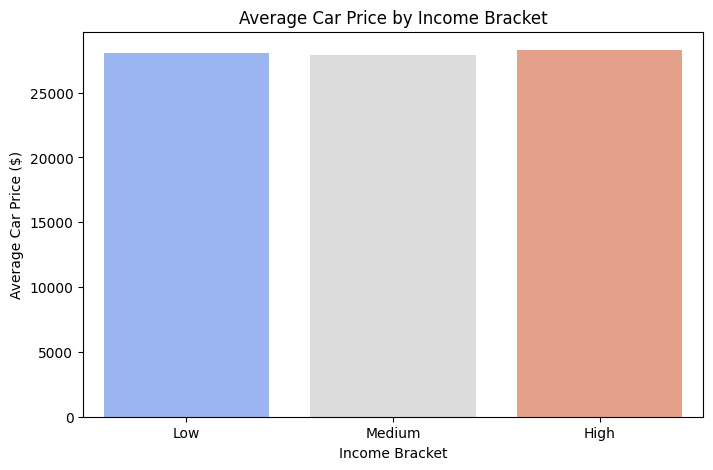

<ipython-input-29-7d543db29da0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Income Bracket", y="Price ($)", palette="coolwarm")


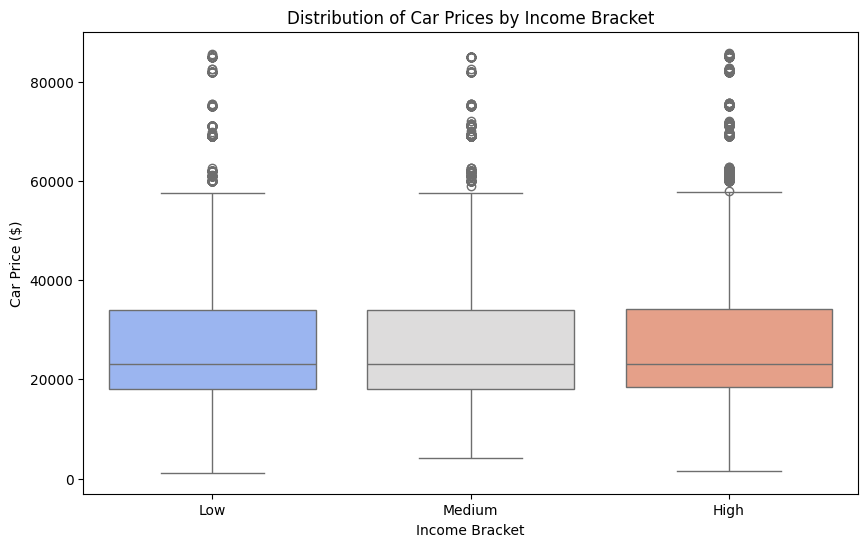

In [29]:
#9. How do car prices vary based on the customer’s annual income bracket ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Define income brackets using quantiles (low, medium, high income groups)
df["Income Bracket"] = pd.qcut(df["Annual Income"], q=3, labels=["Low", "Medium", "High"])

# Compute average car price for each income bracket
income_price_avg = df.groupby("Income Bracket")["Price ($)"].mean().reset_index()

# Display average prices by income bracket
print(income_price_avg)

# Visualization: Bar chart for average car price by income bracket
plt.figure(figsize=(8, 5))
sns.barplot(data=income_price_avg, x="Income Bracket", y="Price ($)", palette="coolwarm")
plt.xlabel("Income Bracket")
plt.ylabel("Average Car Price ($)")
plt.title("Average Car Price by Income Bracket")
plt.show()

# Visualization: Box plot to show price distribution by income bracket
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Income Bracket", y="Price ($)", palette="coolwarm")
plt.xlabel("Income Bracket")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Income Bracket")
plt.show()


Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


<ipython-input-30-014ede6b44d9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_models_sales, x="Model", y="Price ($)", palette="coolwarm")


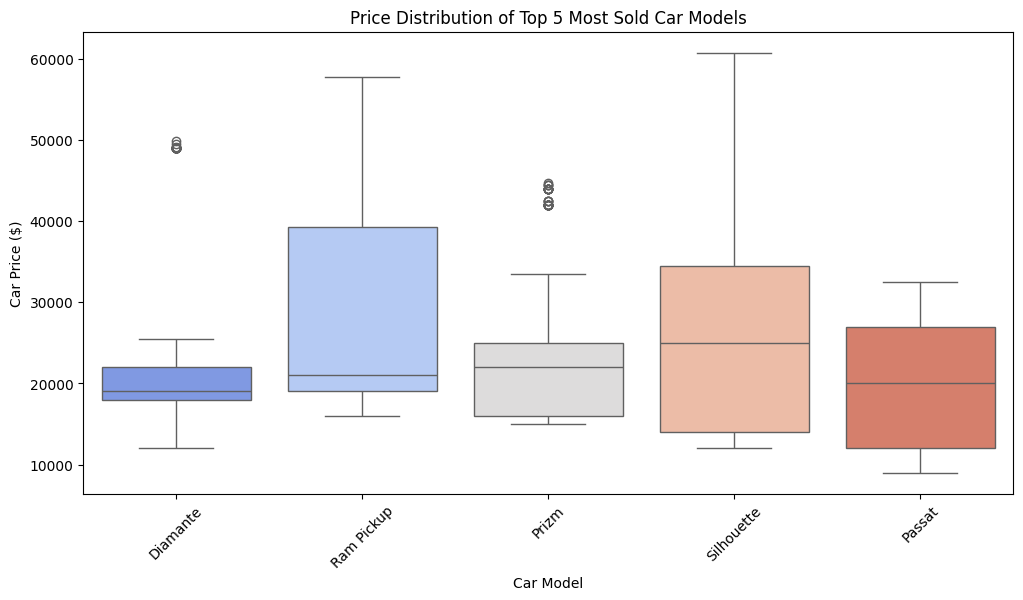

In [30]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Identify top 5 most sold car models
top_models = df["Model"].value_counts().nlargest(5).index
top_models_sales = df[df["Model"].isin(top_models)]

# Display the top 5 models and their sales count
top_model_counts = df["Model"].value_counts().nlargest(5)
print(top_model_counts)

# Visualization: Box plot for price distribution of top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_models_sales, x="Model", y="Price ($)", palette="coolwarm")
plt.xlabel("Car Model")
plt.ylabel("Car Price ($)")
plt.title("Price Distribution of Top 5 Most Sold Car Models")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


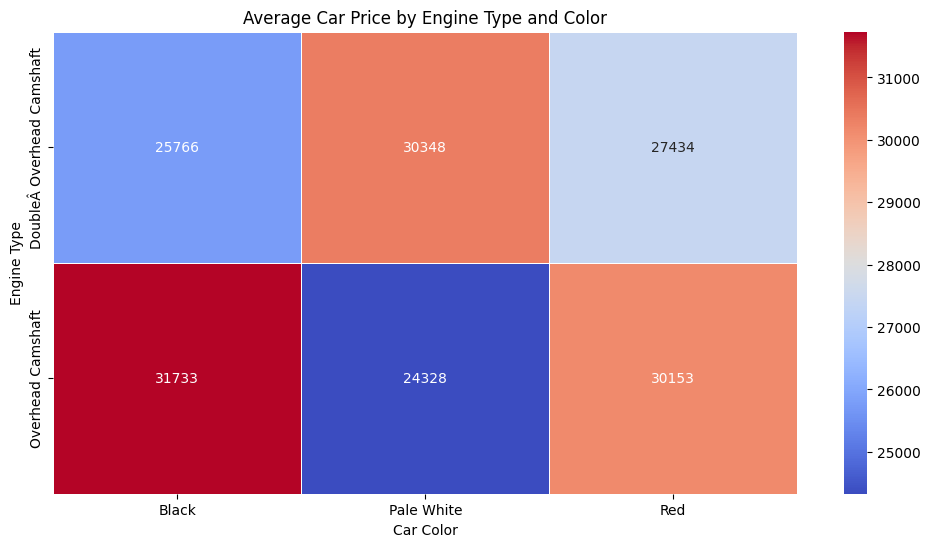

<ipython-input-31-d1002baf85a8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_price_variation, x="Color", y="Price ($)", palette="coolwarm")


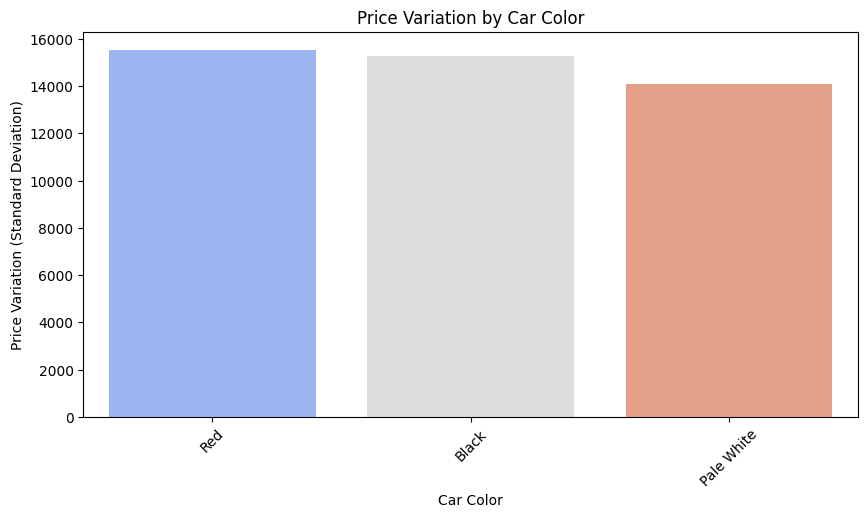

In [31]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Compute the average price for each (Engine, Color) combination
engine_color_price = df.groupby(["Engine", "Color"])["Price ($)"].mean().unstack()

# Compute standard deviation of price for each color
color_price_variation = df.groupby("Color")["Price ($)"].std().reset_index()
color_price_variation = color_price_variation.sort_values(by="Price ($)", ascending=False)

# Display the color price variation
print(color_price_variation)

# Visualization: Heatmap of average price by Engine and Color
plt.figure(figsize=(12, 6))
sns.heatmap(engine_color_price, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Car Color")
plt.ylabel("Engine Type")
plt.title("Average Car Price by Engine Type and Color")
plt.show()

# Visualization: Bar chart for price variation by color
plt.figure(figsize=(10, 5))
sns.barplot(data=color_price_variation, x="Color", y="Price ($)", palette="coolwarm")
plt.xlabel("Car Color")
plt.ylabel("Price Variation (Standard Deviation)")
plt.title("Price Variation by Car Color")
plt.xticks(rotation=45)
plt.show()


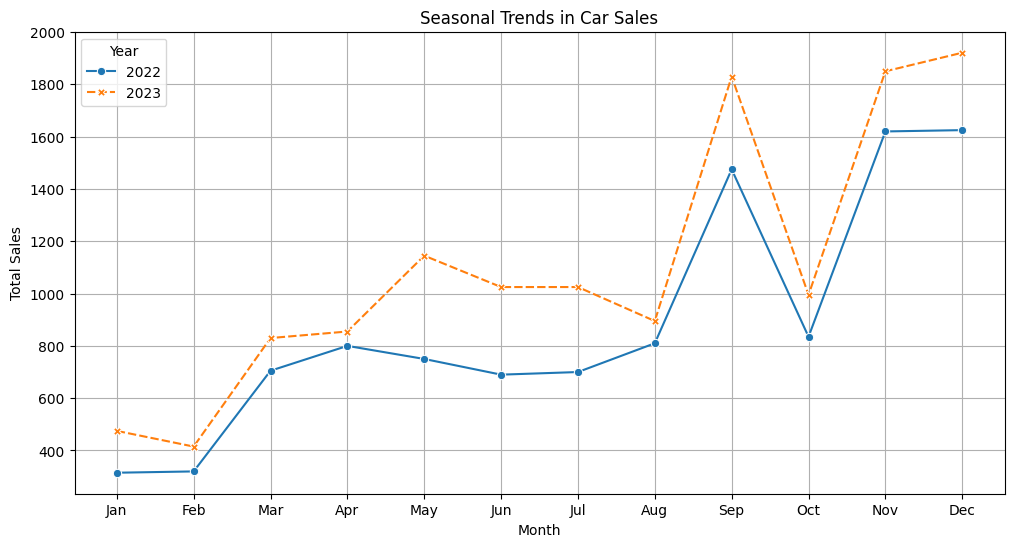

In [32]:
#12. Is there any seasonal trend in car sales based on the date of sale?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract Year and Month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Aggregate sales per month
monthly_sales = df.groupby(["Year", "Month"]).size().reset_index(name="Total Sales")

# Pivot table for visualization
monthly_sales_pivot = monthly_sales.pivot(index="Month", columns="Year", values="Total Sales")

# Visualization: Line plot for monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_pivot, markers=True)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Seasonal Trends in Car Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid()
plt.show()


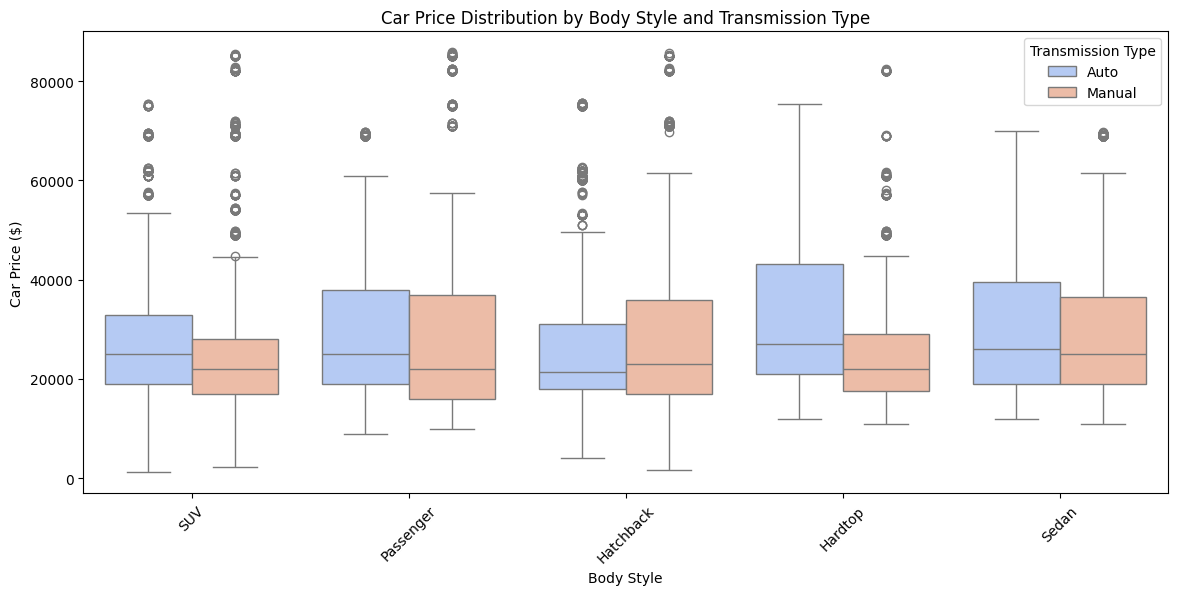

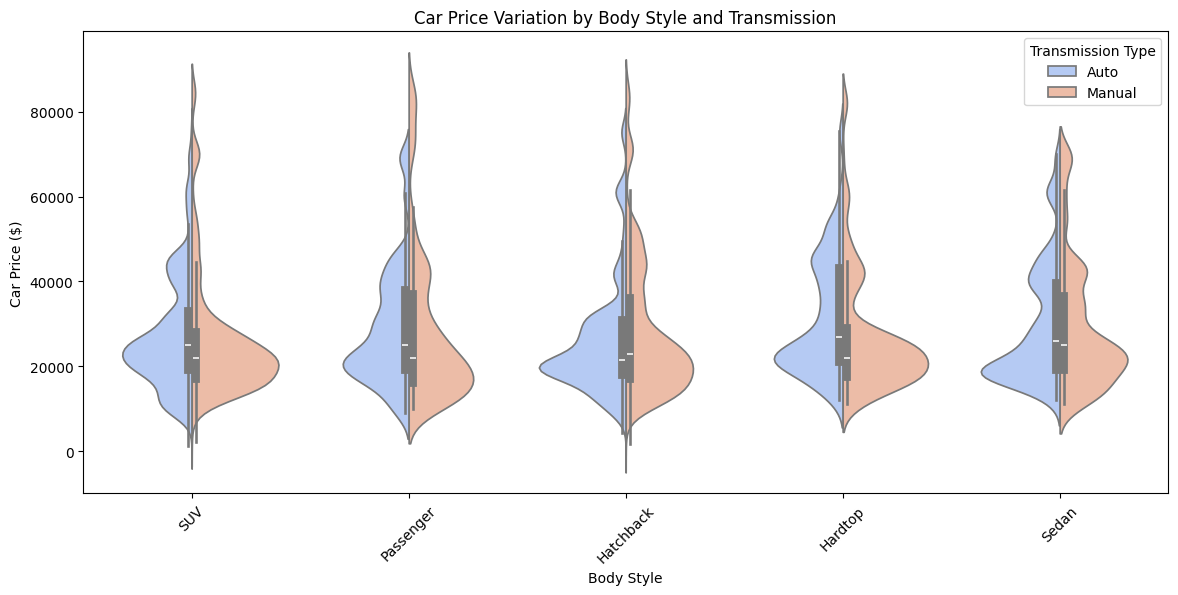

In [33]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Remove missing values in relevant columns (if any)
df = df.dropna(subset=["Body Style", "Transmission", "Price ($)"])

# Visualization: Box plot of price distribution by Body Style and Transmission
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Body Style", y="Price ($)", hue="Transmission", palette="coolwarm")
plt.xlabel("Body Style")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.legend(title="Transmission Type")
plt.show()

# Visualization: Violin plot for detailed distribution
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x="Body Style", y="Price ($)", hue="Transmission", split=True, palette="coolwarm")
plt.xlabel("Body Style")
plt.ylabel("Car Price ($)")
plt.title("Car Price Variation by Body Style and Transmission")
plt.xticks(rotation=45)
plt.legend(title="Transmission Type")
plt.show()


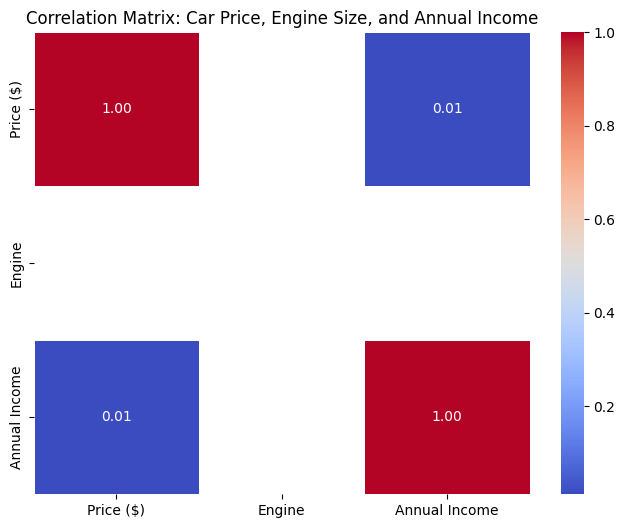

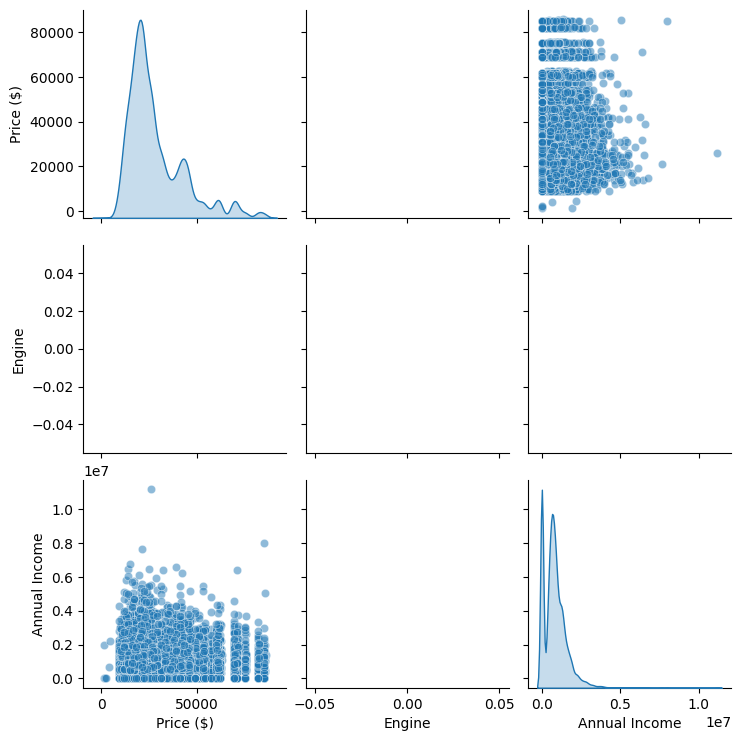

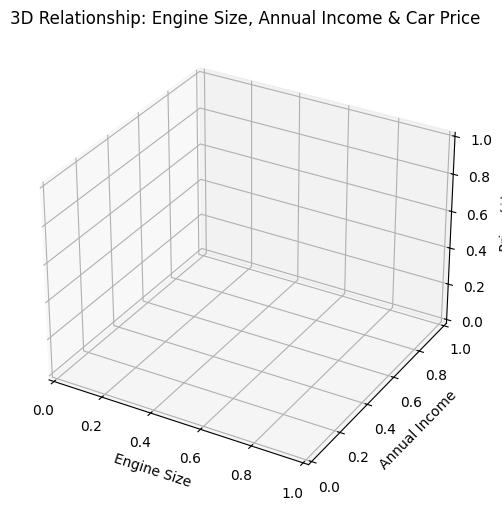

In [34]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("/content/Car Sale.csv")  # Ensure correct file path

# Remove missing values in relevant columns
df = df.dropna(subset=["Price ($)", "Engine", "Annual Income"])

# Convert 'Engine' to numeric (extract numbers if it contains text like 'V6', 'I4')
df["Engine"] = df["Engine"].str.extract("(\d+)").astype(float)

# Compute correlation matrix
correlation_matrix = df[["Price ($)", "Engine", "Annual Income"]].corr()

# Visualization: Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Car Price, Engine Size, and Annual Income")
plt.show()

# Visualization: Pair plot to observe interactions
sns.pairplot(df, vars=["Price ($)", "Engine", "Annual Income"], diag_kind="kde", plot_kws={'alpha': 0.5})
plt.show()

# 3D Scatter Plot (Optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["Engine"], df["Annual Income"], df["Price ($)"], c=df["Price ($)"], cmap="coolwarm", alpha=0.6)

ax.set_xlabel("Engine Size")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Price ($)")
ax.set_title("3D Relationship: Engine Size, Annual Income & Car Price")

plt.show()


<ipython-input-43-2ea99d0193e5>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Engine Size")


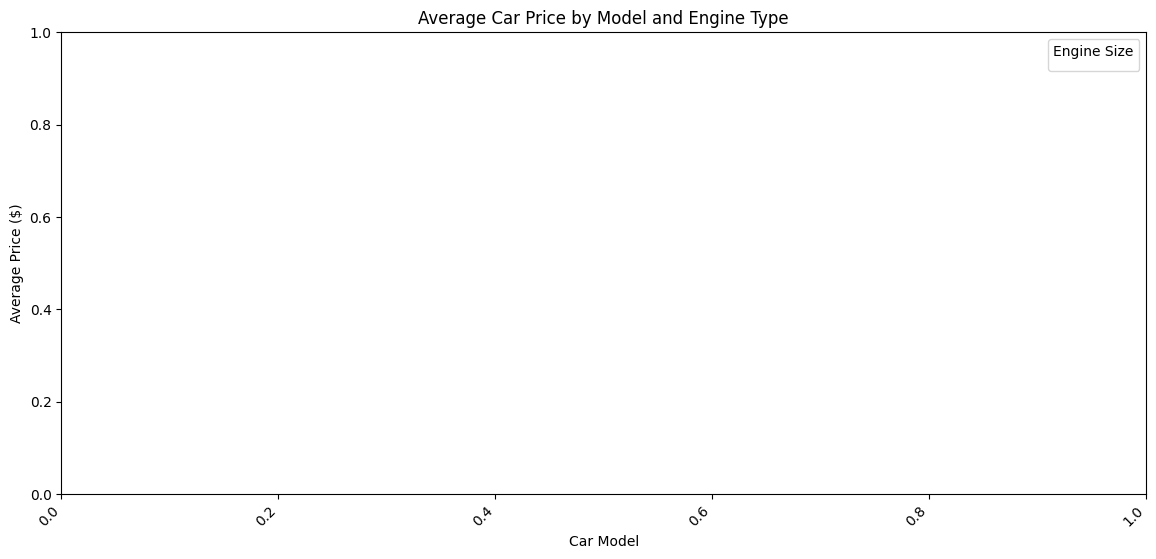

No valid data available for heatmap.


In [43]:
#15. How does the average car price vary across different car models and engine types ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Car Sale.csv")

# Drop rows with missing values in key columns
df = df.dropna(subset=["Model", "Engine", "Price ($)"])

# Extract numeric part of engine sizes
df["Engine"] = df["Engine"].astype(str).str.extract("(\d+)")  # Extract numbers
df["Engine"] = pd.to_numeric(df["Engine"], errors="coerce")  # Convert to numeric

# Remove NaN values after conversion
df = df.dropna(subset=["Engine"])

# Ensure "Price ($)" is numeric
df["Price ($)"] = pd.to_numeric(df["Price ($)"], errors="coerce")
df = df.dropna(subset=["Price ($)"])  # Remove NaNs in price

# Compute average price for each (Model, Engine) combination
avg_price_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()

# Sort by price
avg_price_model_engine = avg_price_model_engine.sort_values(by="Price ($)", ascending=False)

# Bar Plot: Price variation by Model and Engine
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_price_model_engine, x="Model", y="Price ($)", hue="Engine", palette="coolwarm")
plt.xlabel("Car Model")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price by Model and Engine Type")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Engine Size")
plt.show()

# Create Pivot Table
if not avg_price_model_engine.empty:  # Check if DataFrame is not empty
    pivot_table = avg_price_model_engine.pivot(index="Model", columns="Engine", values="Price ($)")

    # Fill missing values with 0
    pivot_table = pivot_table.fillna(0)

    # Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
    plt.xlabel("Engine Size")
    plt.ylabel("Car Model")
    plt.title("Heatmap of Car Prices by Model and Engine Type")
    plt.show()
else:
    print("No valid data available for heatmap.")




#EDA 3 : Amazon Sales Data

<ipython-input-47-af905915d79f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="category", data=top_categories, palette="coolwarm")
<ipython-input-47-af905915d79f>:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), ha="right")


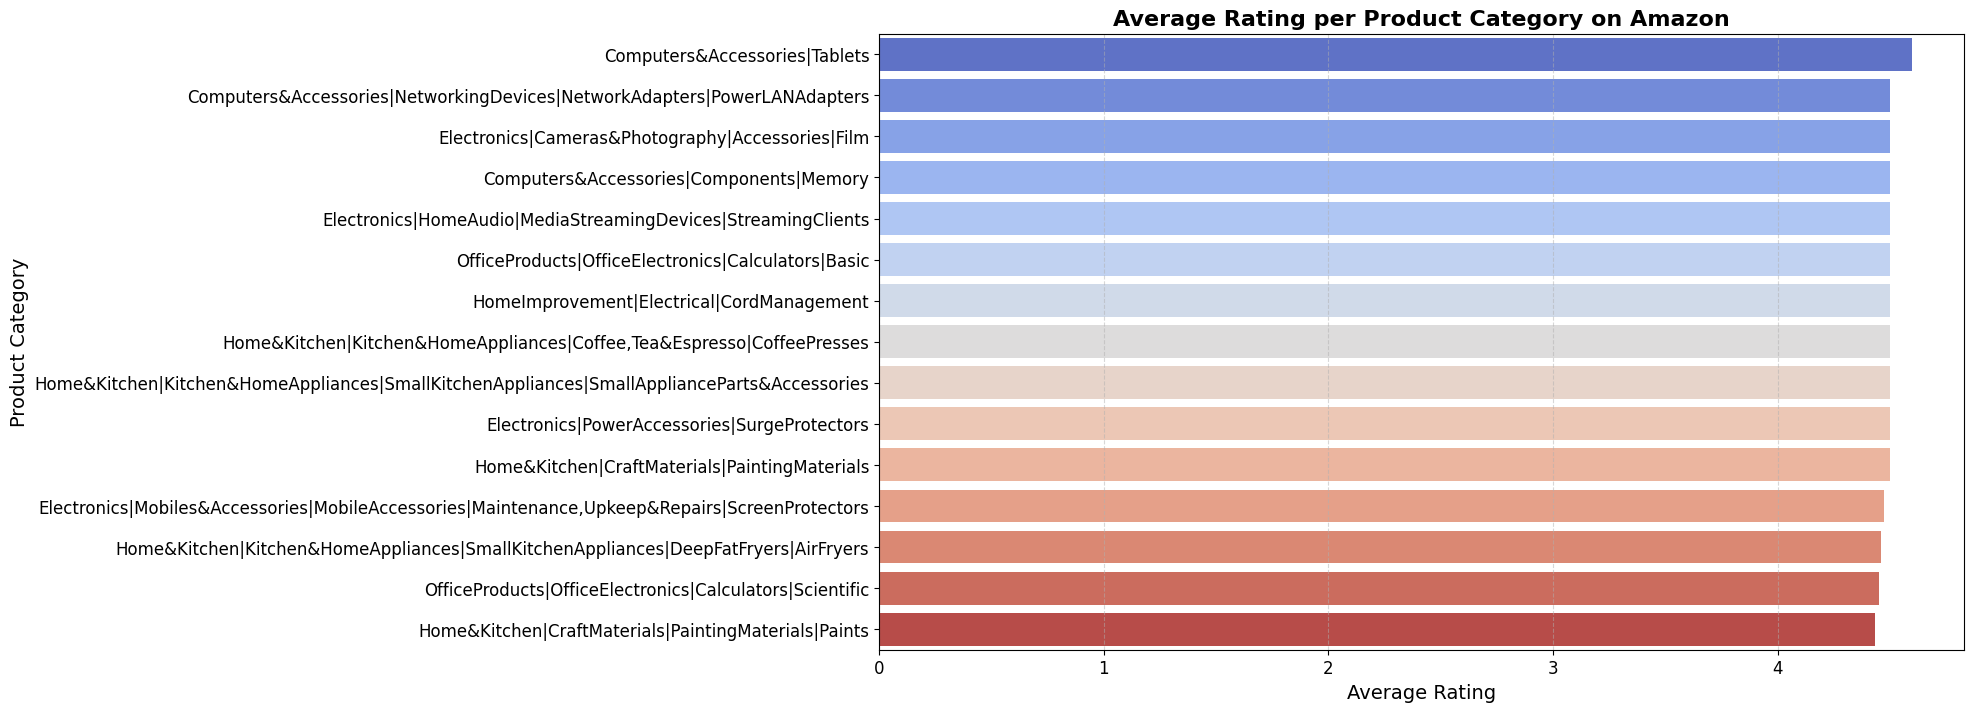

In [47]:
#1. What is the average rating for each product category ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/amazon.csv")

# Clean category names (remove extra spaces)
df["category"] = df["category"].str.strip()

# Drop rows with missing ratings or categories
df = df.dropna(subset=["category", "rating"])

# Ensure rating is numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Calculate average rating for each category
avg_rating_per_category = df.groupby("category")["rating"].mean().reset_index()

# Sort by rating
avg_rating_per_category = avg_rating_per_category.sort_values(by="rating", ascending=False)

# Limit to top 15 categories for better readability
top_categories = avg_rating_per_category.head(15)

# Set figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(x="rating", y="category", data=top_categories, palette="coolwarm")

# Improve readability
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Product Category", fontsize=14)
plt.title("Average Rating per Product Category on Amazon", fontsize=16, fontweight="bold")

# Rotate category names to avoid overlap
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add padding between y-axis labels
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), ha="right")

# Display grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the plot
plt.show()



In [1]:
#2. What are the top rating_count products by category ?

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/amazon.csv")

# Clean category names
df["category"] = df["category"].str.strip()

# Convert rating_count to numeric
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Drop rows with missing category or rating_count
df = df.dropna(subset=["category", "rating_count"])

# Find the product with the highest rating count in each category
top_products = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]

# Sort by rating_count in descending order
top_products = top_products.sort_values(by="rating_count", ascending=False)

# Display results
print(top_products)


                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
32    Computers&Accessories|Accessories&Peripherals|...   
1272  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...   
...                                                 ...   
529   Electronics|Mobiles&Accessories|MobileAccessor...   
934   Computers&Accessories|ExternalDevices&DataStor...   
210         Electronics|HomeTheater,TV&Video|Projectors   
775   Computers&Accessories|Accessories&Peripherals|...   
1222  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   

                                           product_name  rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0  
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0  
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0  
32 

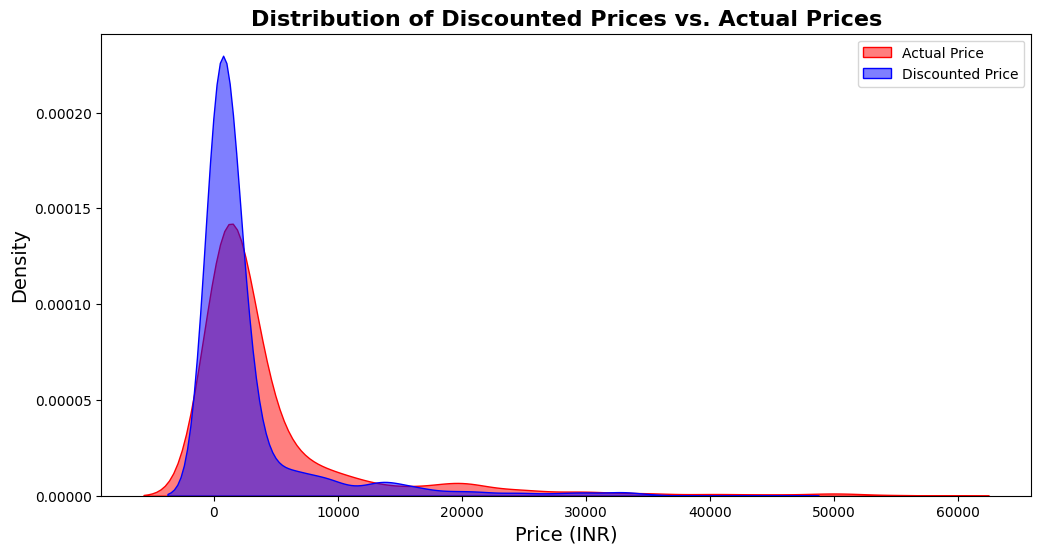

In [7]:
#3. What is the distribution of discounted prices vs. actual prices ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# Clean price columns (Remove ₹, commas, and convert to numeric)
df["discounted_price"] = df["discounted_price"].astype(str).str.replace(r"[^\d.]", "", regex=True).astype(float)
df["actual_price"] = df["actual_price"].astype(str).str.replace(r"[^\d.]", "", regex=True).astype(float)

# Drop rows with missing or zero prices
df = df.dropna(subset=["discounted_price", "actual_price"])
df = df[(df["discounted_price"] > 0) & (df["actual_price"] > 0)]

# Remove extreme outliers (Prices beyond 99th percentile)
price_limit = df["actual_price"].quantile(0.99)
df = df[df["actual_price"] <= price_limit]

# Set figure size
plt.figure(figsize=(12, 6))

# KDE Plot for price distribution
sns.kdeplot(df["actual_price"], label="Actual Price", color="red", fill=True, alpha=0.5)
sns.kdeplot(df["discounted_price"], label="Discounted Price", color="blue", fill=True, alpha=0.5)

# Improve readability
plt.xlabel("Price (INR)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Discounted Prices vs. Actual Prices", fontsize=16, fontweight="bold")
plt.legend()

# Show plot
plt.show()







<ipython-input-34-476537119113>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_df, y="Category", x="Avg Discount %", palette="coolwarm")


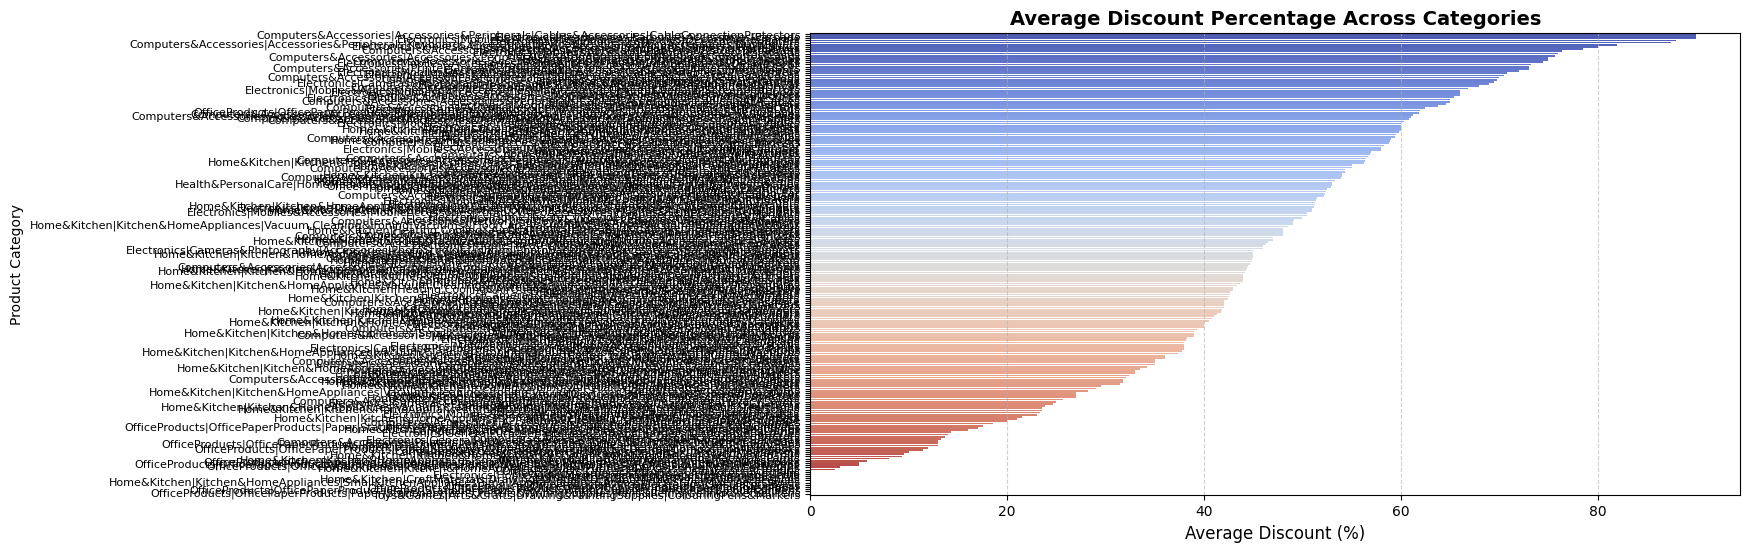

In [34]:
#4. How does the average discount percentage vary across categories ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# Convert 'discount_percentage' from string to numeric (removing '%')
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)

# Calculate average discount percentage per category
category_discount = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)

# Convert to DataFrame
category_df = pd.DataFrame({"Category": category_discount.index, "Avg Discount %": category_discount.values})

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=category_df, y="Category", x="Avg Discount %", palette="coolwarm")

# Formatting
plt.xlabel("Average Discount (%)", fontsize=12)
plt.ylabel("Product Category", fontsize=10)
plt.title("Average Discount Percentage Across Categories", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  # Reduce font size to avoid overlapping
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()



<ipython-input-32-9f8d8a506132>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_df, y="Product Name", x="Frequency", palette="coolwarm")


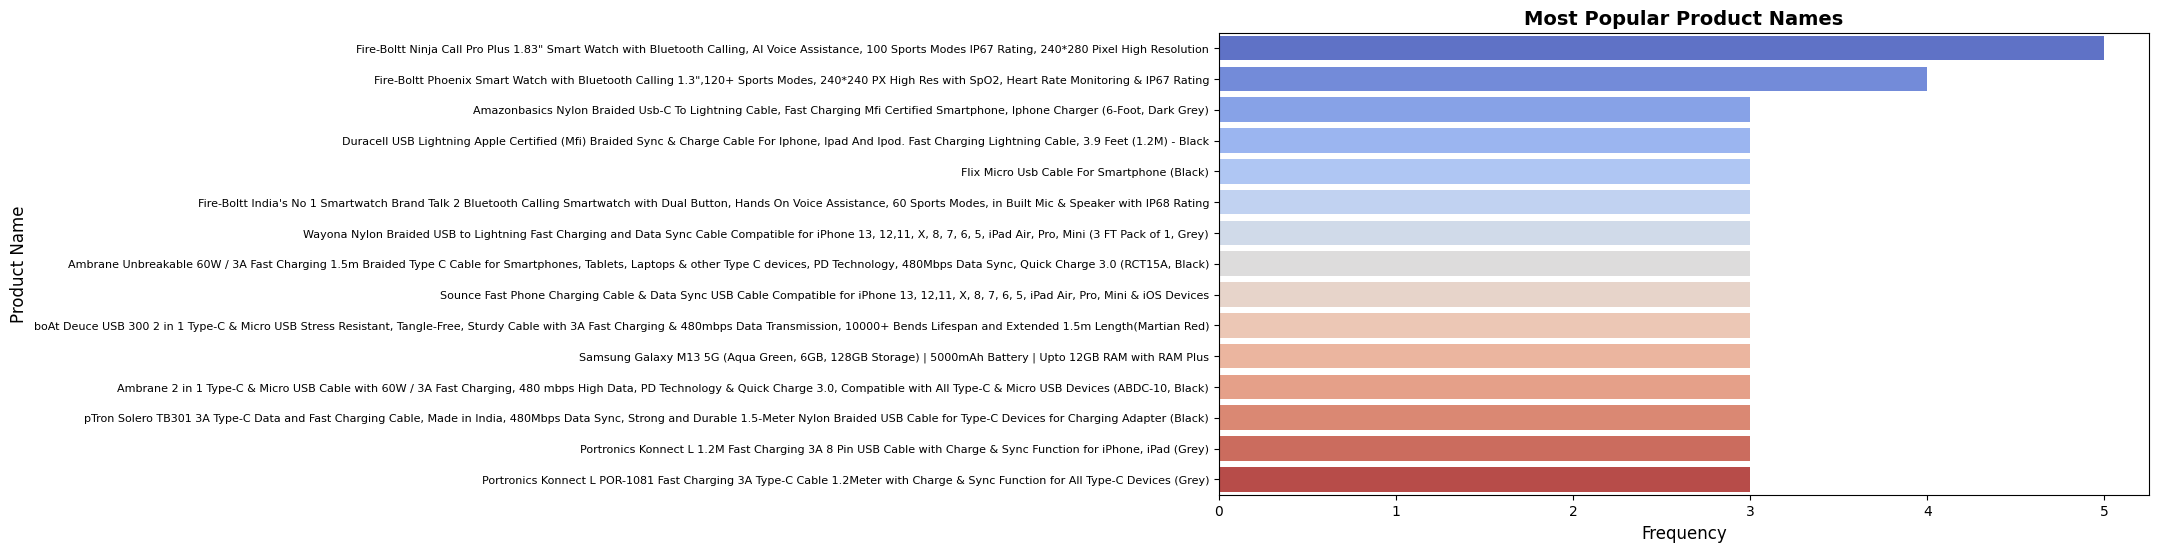

In [32]:
#5. What are the most popular product names ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# Count occurrences of each product name
product_counts = df["product_name"].value_counts().head(15)  # Top 15 products

# Convert to DataFrame for visualization
product_df = pd.DataFrame({"Product Name": product_counts.index, "Frequency": product_counts.values})

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=product_df, y="Product Name", x="Frequency", palette="coolwarm")

# Labeling
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Most Popular Product Names", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.show()


<ipython-input-31-b5b3bc4b26c0>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keyword_df, x="Frequency", y="Keyword", palette="coolwarm")


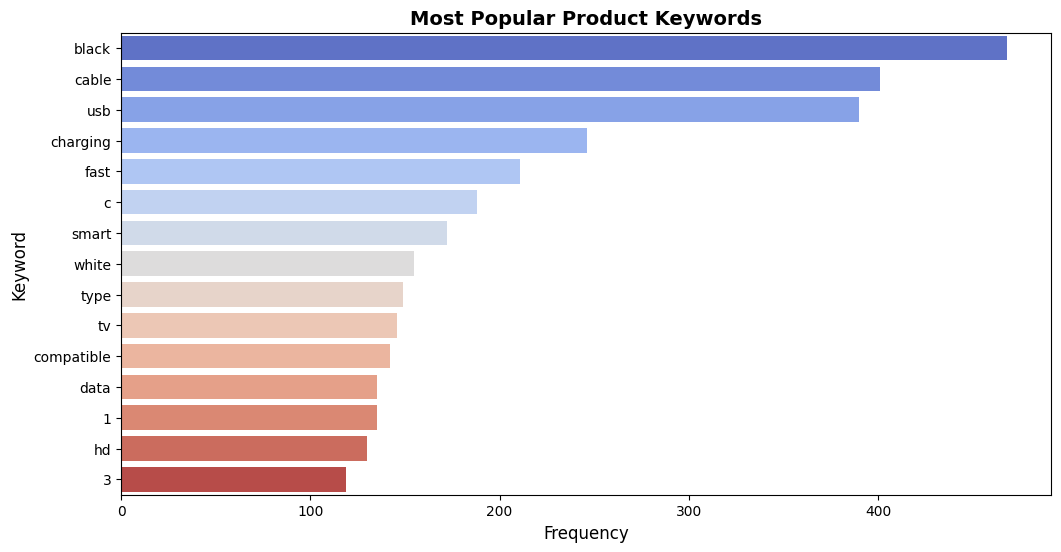

In [31]:
# 6. What are the most popular product keywords ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# Preprocess product names
df["product_name"] = df["product_name"].astype(str).str.lower()  # Convert to lowercase
df["product_name"] = df["product_name"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x))  # Remove special characters

# Tokenization: Split product names into words
all_words = " ".join(df["product_name"]).split()

# Remove common stopwords (modify list if needed)
stopwords = {"for", "with", "the", "and", "to", "of", "in", "on", "by", "is", "a", "an"}
filtered_words = [word for word in all_words if word not in stopwords]

# Count word occurrences
word_counts = Counter(filtered_words)
top_keywords = word_counts.most_common(15)  # Get top 15 keywords

# Convert to DataFrame for visualization
keyword_df = pd.DataFrame(top_keywords, columns=["Keyword", "Frequency"])

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=keyword_df, x="Frequency", y="Keyword", palette="coolwarm")

# Labeling
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.title("Most Popular Product Keywords", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


<ipython-input-37-c76346b7b15f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating_count", y="product_name", data=top_reviews, palette="coolwarm")


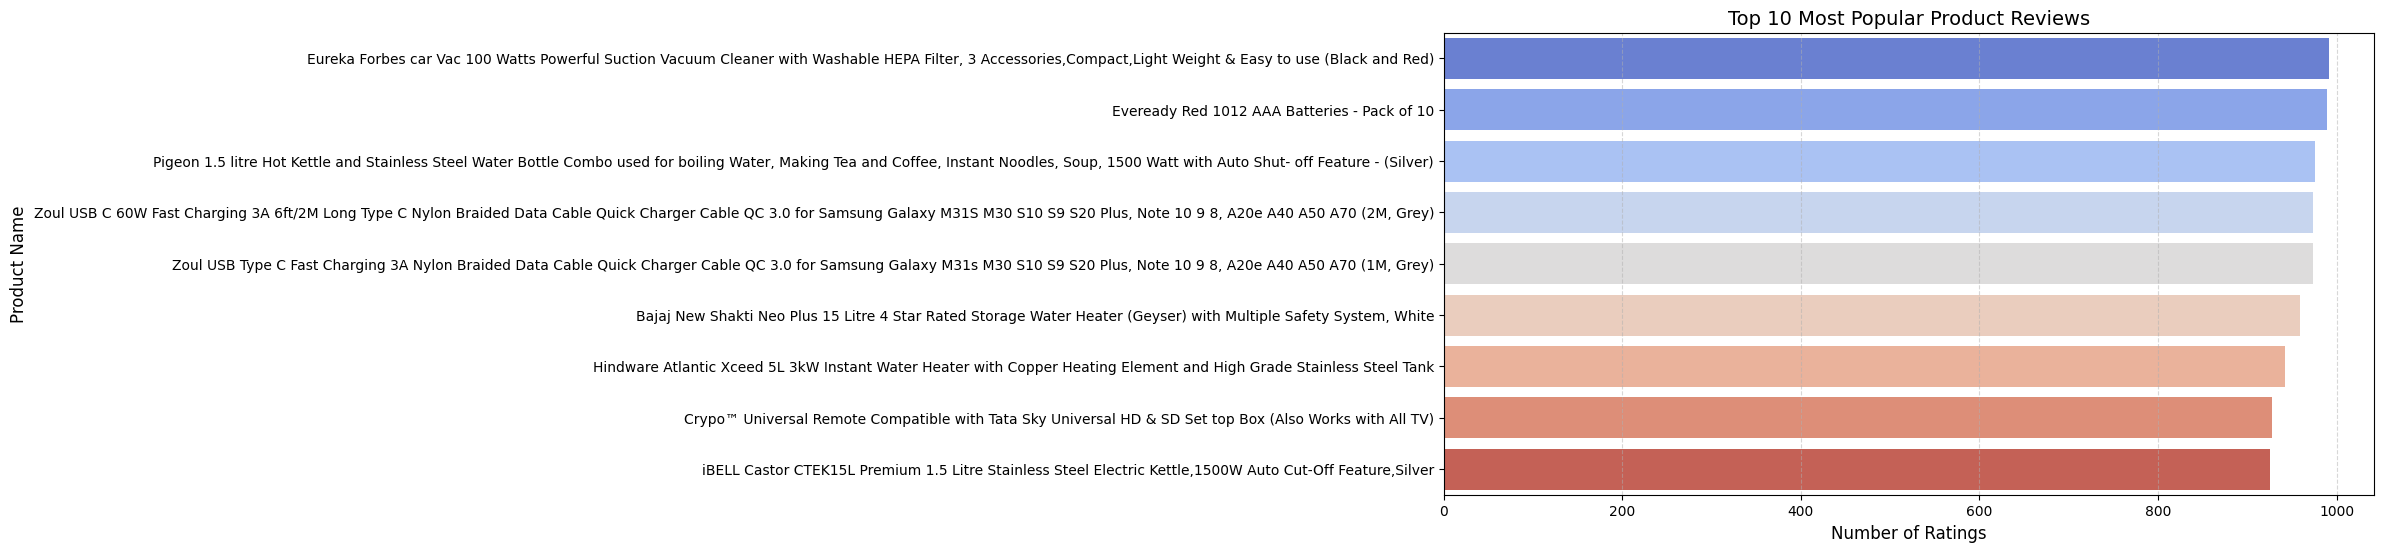

In [37]:
#7. What are the most popular product reviews?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# Convert 'rating_count' to numeric
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Drop NaN values in 'rating_count'
df = df.dropna(subset=["rating_count"])

# Get the top 10 most popular product reviews
top_reviews = df[["product_name", "review_title", "rating_count"]].sort_values(
    by="rating_count", ascending=False).head(10)

# Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x="rating_count", y="product_name", data=top_reviews, palette="coolwarm")

# Formatting
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Most Popular Product Reviews", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the graph
plt.show()


Correlation between Discounted Price and Rating: 0.12


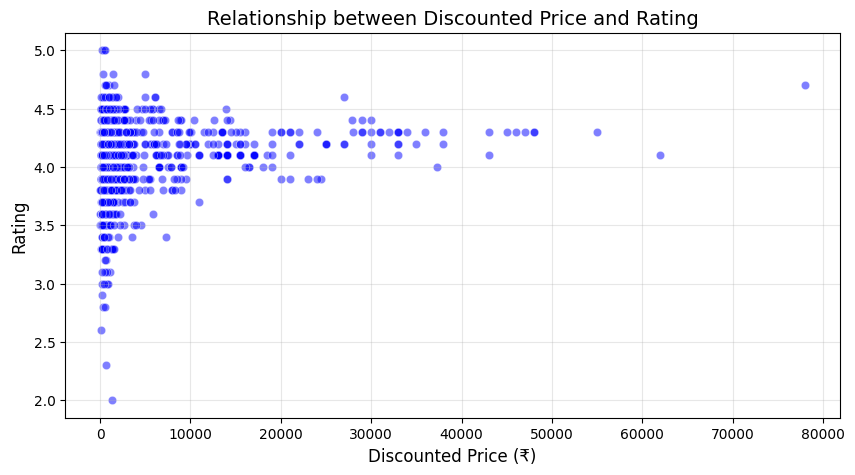

In [38]:
#8. What is the correlation between discounted_price and rating?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# Convert 'discounted_price' to numeric (remove special characters if any)
df["discounted_price"] = (
    df["discounted_price"]
    .astype(str)
    .str.replace("₹", "")
    .str.replace(",", "")
    .astype(float)
)

# Convert 'rating' to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Drop NaN values in 'discounted_price' and 'rating'
df = df.dropna(subset=["discounted_price", "rating"])

# Calculate correlation
correlation = df["discounted_price"].corr(df["rating"])
print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")

# Visualization: Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["discounted_price"], y=df["rating"], alpha=0.5, color="blue")

# Formatting
plt.xlabel("Discounted Price (₹)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Relationship between Discounted Price and Rating", fontsize=14)
plt.grid(alpha=0.3)

# Show the graph
plt.show()


<ipython-input-39-6535505c63ed>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="category", data=top_5_categories, palette="viridis")


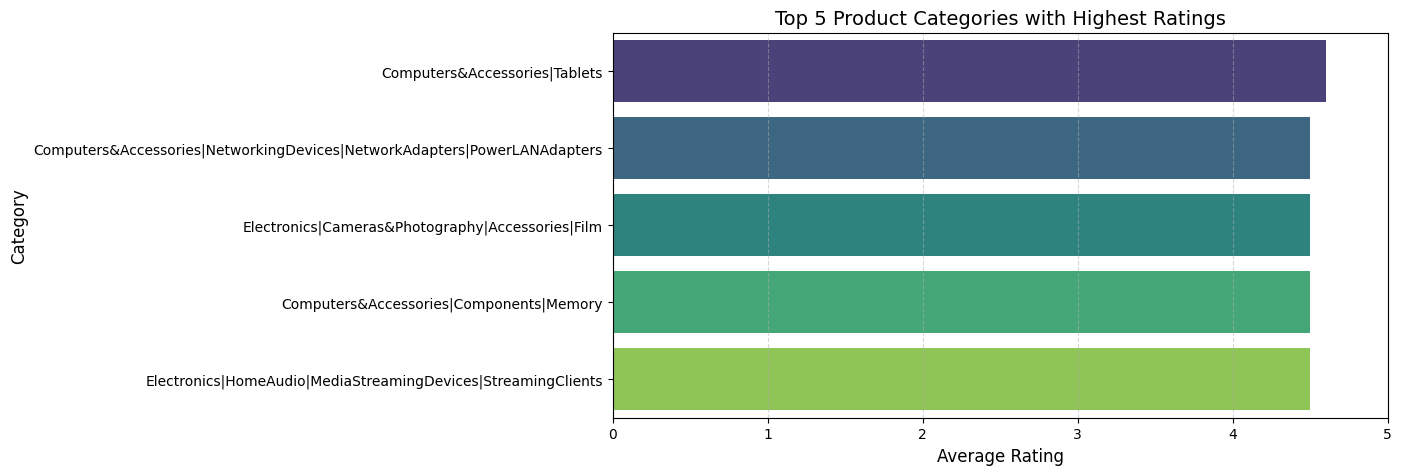

                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


In [39]:
#9. What are the Top 5 categories based on the highest ratings ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# Convert 'rating' to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Drop NaN values in 'rating'
df = df.dropna(subset=["rating"])

# Group by category and compute the average rating
category_ratings = df.groupby("category")["rating"].mean().reset_index()

# Sort categories by highest average rating
top_5_categories = category_ratings.sort_values(by="rating", ascending=False).head(5)

# Visualization: Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="rating", y="category", data=top_5_categories, palette="viridis")

# Formatting
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Top 5 Product Categories with Highest Ratings", fontsize=14)
plt.xlim(0, 5)  # Ratings are between 1 and 5
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the graph
plt.show()

# Display the top 5 categories with ratings
print(top_5_categories)


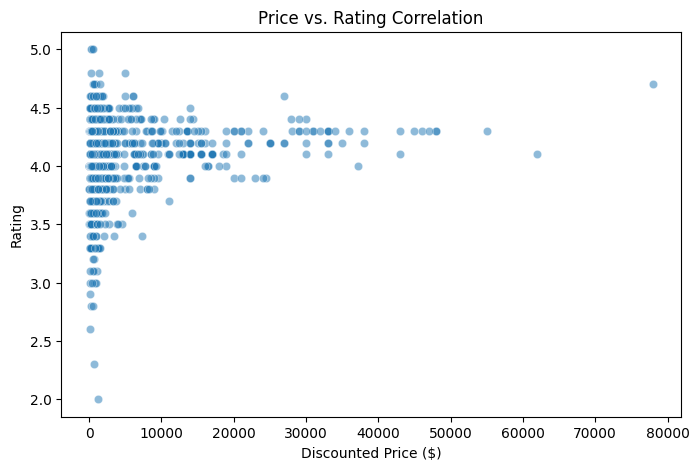

<ipython-input-41-aa3bfbab4202>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")


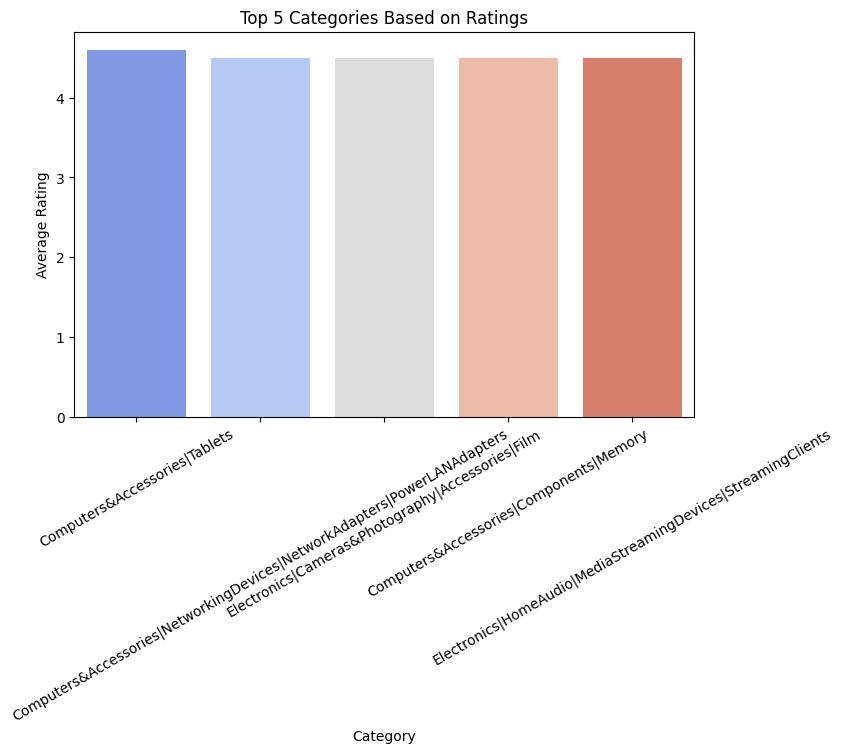

<ipython-input-41-aa3bfbab4202>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=discount_by_category.index, x=discount_by_category.values, palette="viridis")


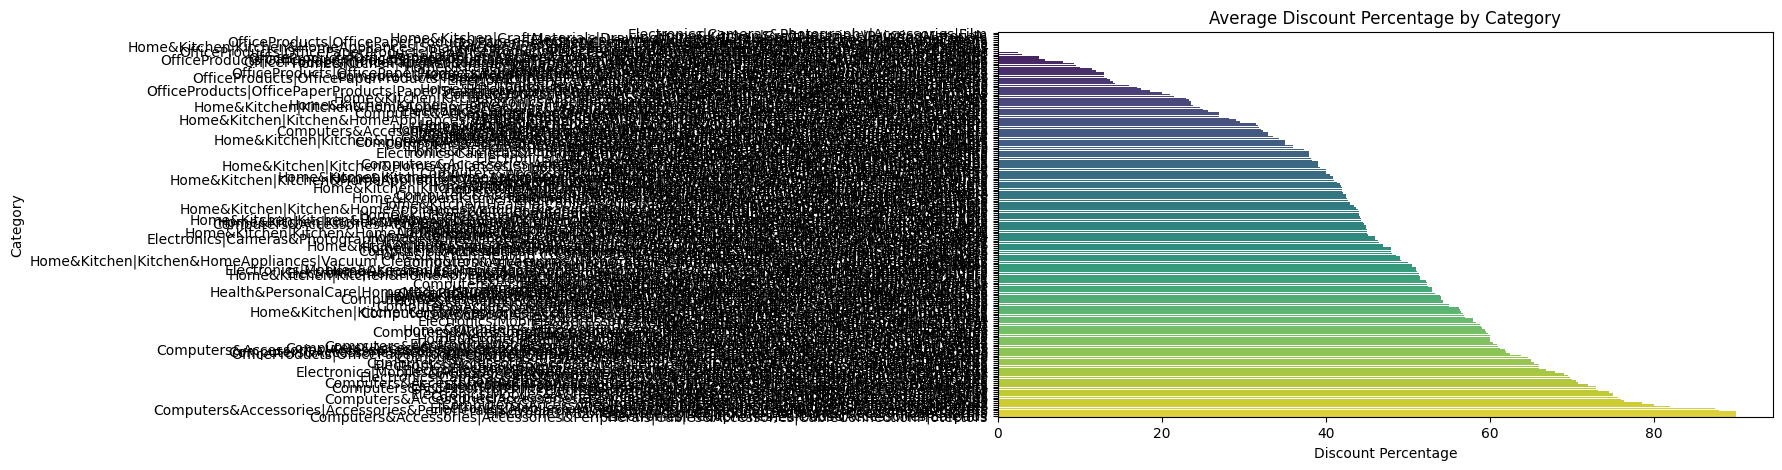

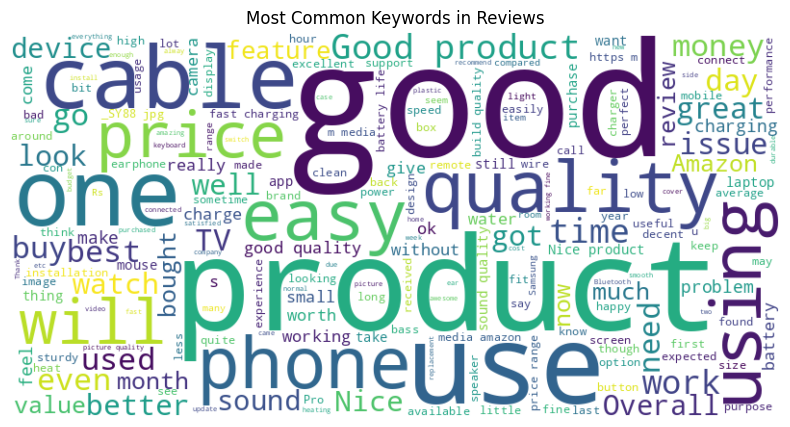

<ipython-input-41-aa3bfbab4202>:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["review_id"].astype(str).str[:8], errors="coerce")


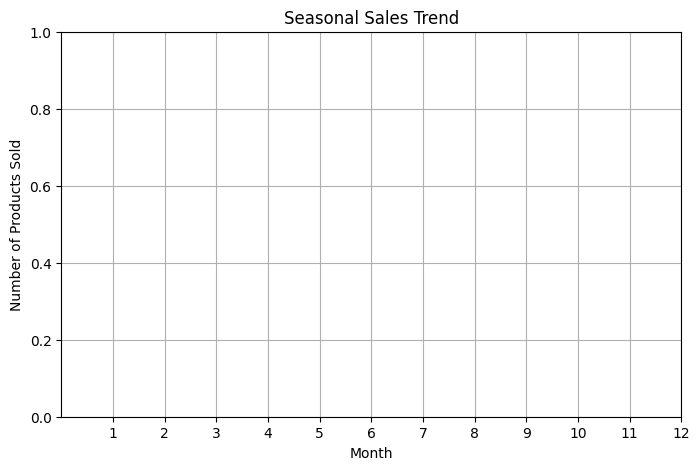

In [41]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Load dataset
file_path = "/content/amazon.csv"  # Update with your dataset path
df = pd.read_csv(file_path)

# Convert columns to numeric (handling percentage strings and currency symbols)
df["discount_percentage"] = df["discount_percentage"].str.replace('%', '').astype(float)
df["discounted_price"] = df["discounted_price"].replace({'₹': '', ',': ''}, regex=True).astype(float)
df["actual_price"] = df["actual_price"].replace({'₹': '', ',': ''}, regex=True).astype(float)
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')

# Drop missing values in key columns
df.dropna(subset=["rating", "discounted_price", "actual_price", "discount_percentage"], inplace=True)

# ------ 1️⃣ Price vs. Rating Correlation ------
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["discounted_price"], y=df["rating"], alpha=0.5)
plt.title("Price vs. Rating Correlation")
plt.xlabel("Discounted Price ($)")
plt.ylabel("Rating")
plt.show()

# ------ 2️⃣ Top 5 Best Rated Categories ------
top_categories = df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")
plt.title("Top 5 Categories Based on Ratings")
plt.xticks(rotation=30)
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

# ------ 3️⃣ Discount Percentage Across Categories ------
discount_by_category = df.groupby("category")["discount_percentage"].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(y=discount_by_category.index, x=discount_by_category.values, palette="viridis")
plt.title("Average Discount Percentage by Category")
plt.xlabel("Discount Percentage")
plt.ylabel("Category")
plt.show()

# ------ 4️⃣ Word Cloud for Most Frequent Review Keywords ------
text = " ".join(review for review in df["review_content"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Reviews")
plt.show()

# ------ 5️⃣ Monthly Sales Trend ------
df["date"] = pd.to_datetime(df["review_id"].astype(str).str[:8], errors="coerce")
df["month"] = df["date"].dt.month
monthly_sales = df.groupby("month")["product_id"].count()

plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="blue")
plt.title("Seasonal Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Products Sold")
plt.xticks(range(1, 13))
plt.grid()
plt.show()



#EDA 4 : SPOTIFY DATASET

In [2]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/spotify.csv")  # Replace with actual file path

# Display basic info about dataset
print("Dataset Information:\n")
print(df.info())

# Check for missing values
print("\nMissing Values Before Handling:\n", df.isnull().sum())

# Handling missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify changes
print("\nMissing Values After Handling:\n", df.isnull().sum())
print(f"\nNumber of duplicate rows after removal: {df.duplicated().sum()}")


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None

Missing Values Before Handling:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Missing Values After Handling:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows after removal: 0


<ipython-input-2-7555c9d02fea>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


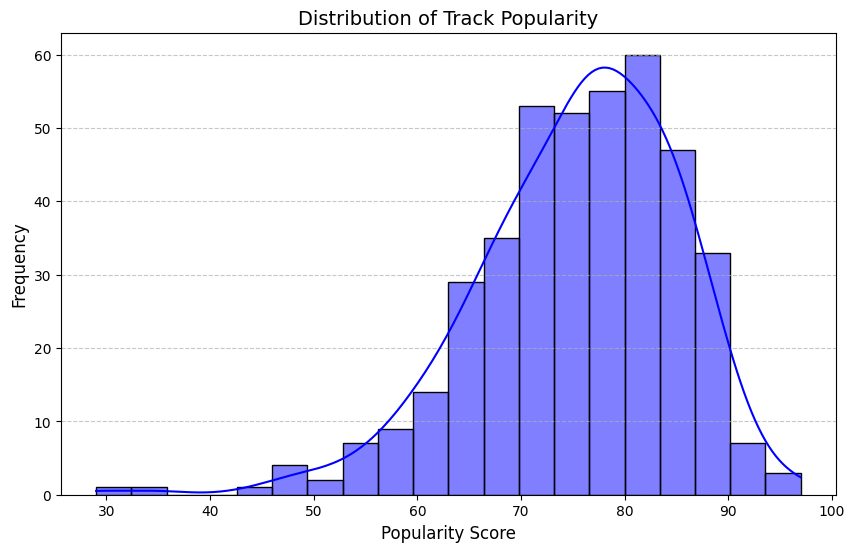

In [3]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")

# Titles and labels
plt.title("Distribution of Track Popularity", fontsize=14)
plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


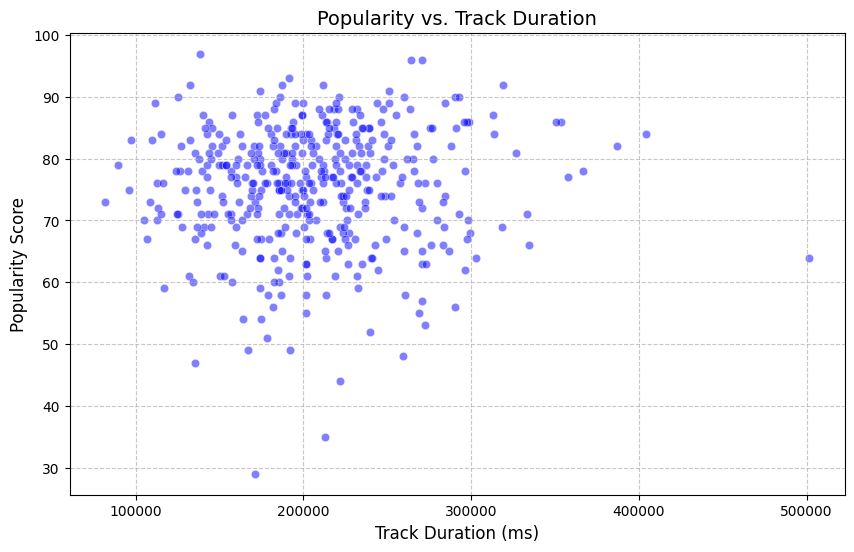

In [4]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Popularity vs. Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration (ms)", y="Popularity", alpha=0.5, color="blue")

# Titles and labels
plt.title("Popularity vs. Track Duration", fontsize=14)
plt.xlabel("Track Duration (ms)", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


<ipython-input-5-b07775c9e1b0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.index, y=artist_counts.values, palette="viridis")


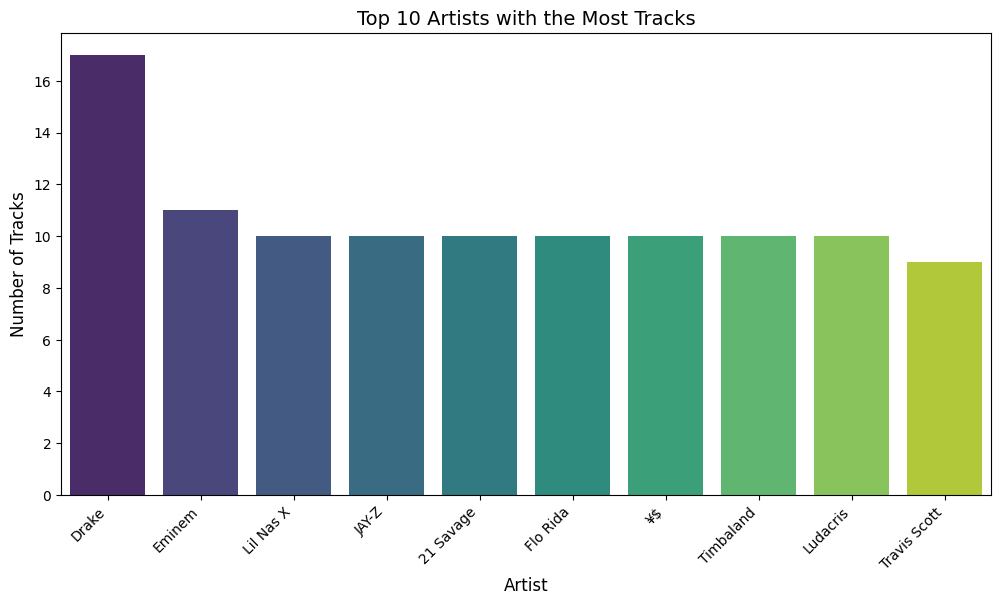

In [5]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tracks per artist
artist_counts = df["Artist"].value_counts().head(10)  # Top 10 artists

# Plot the countplot
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values, palette="viridis")

# Titles and labels
plt.title("Top 10 Artists with the Most Tracks", fontsize=14)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels to prevent overlapping

# Show the plot
plt.show()


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


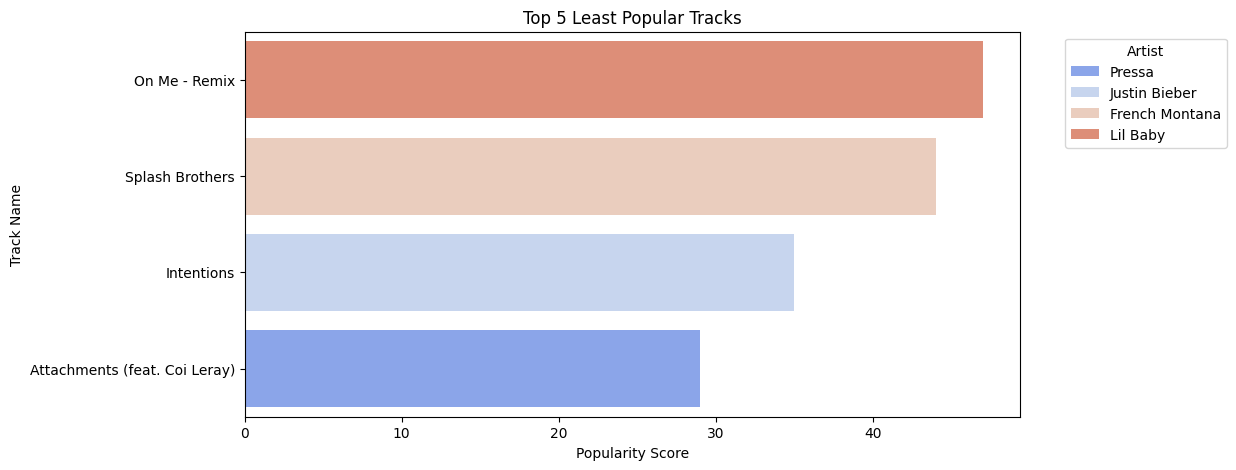

In [6]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

# Check for null values and handle them if necessary
df.dropna(inplace=True)

# Sort the dataset by popularity in ascending order
least_popular_tracks = df.sort_values(by="Popularity", ascending=True).head(5)

# Display the least popular tracks
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[["Artist", "Track Name", "Popularity"]])

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=least_popular_tracks, x="Popularity", y="Track Name", hue="Artist", dodge=False, palette="coolwarm")
plt.xlabel("Popularity Score")
plt.ylabel("Track Name")
plt.title("Top 5 Least Popular Tracks")
plt.gca().invert_yaxis()  # Invert y-axis to show least popular track at the top
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Top 5 Most Popular Artists (by average popularity):
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


<ipython-input-7-84fb7b0fb8bc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_artists, x="Popularity", y="Artist", palette="magma")


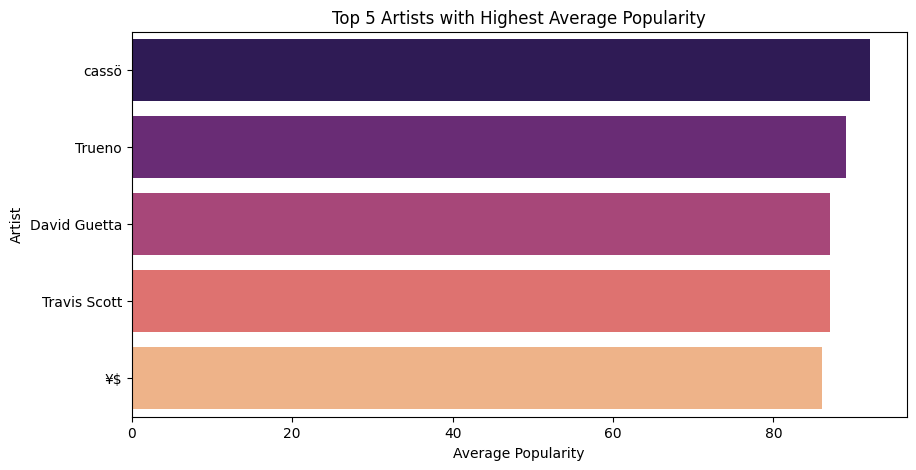

In [7]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

# Check for null values and handle them if necessary
df.dropna(inplace=True)

# Calculate average popularity for each artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean().reset_index()

# Get the top 5 most popular artists based on average popularity
top_5_artists = artist_avg_popularity.sort_values(by="Popularity", ascending=False).head(5)

# Display the top 5 artists and their average popularity
print("Top 5 Most Popular Artists (by average popularity):")
print(top_5_artists)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5_artists, x="Popularity", y="Artist", palette="magma")
plt.xlabel("Average Popularity")
plt.ylabel("Artist")
plt.title("Top 5 Artists with Highest Average Popularity")
plt.show()


In [9]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

# Drop missing values if any
df.dropna(subset=["Artist", "Track Name", "Popularity"], inplace=True)

# Step 1: Find the top 5 most popular artists based on average popularity
top_5_artists = df.groupby("Artist")["Popularity"].mean().reset_index()
top_5_artists = top_5_artists.sort_values(by="Popularity", ascending=False).head(5)

# Step 2: Find the most popular track for each of the top 5 artists
most_popular_tracks = []
for artist in top_5_artists["Artist"]:
    top_track = df[df["Artist"] == artist].sort_values(by="Popularity", ascending=False).iloc[0]
    most_popular_tracks.append([artist, top_track["Track Name"], top_track["Popularity"]])

# Convert to DataFrame for display
most_popular_tracks_df = pd.DataFrame(most_popular_tracks, columns=["Artist", "Most Popular Track", "Popularity"])

# Display the results
print("Most Popular Tracks for the Top 5 Artists:")
print(most_popular_tracks_df)


Most Popular Tracks for the Top 5 Artists:
         Artist            Most Popular Track  Popularity
0         cassö                         Prada          92
1        Trueno  Mamichula - con Nicki Nicole          89
2  David Guetta            Baby Don't Hurt Me          87
3  Travis Scott    FE!N (feat. Playboi Carti)          93
4            ¥$                      CARNIVAL          96


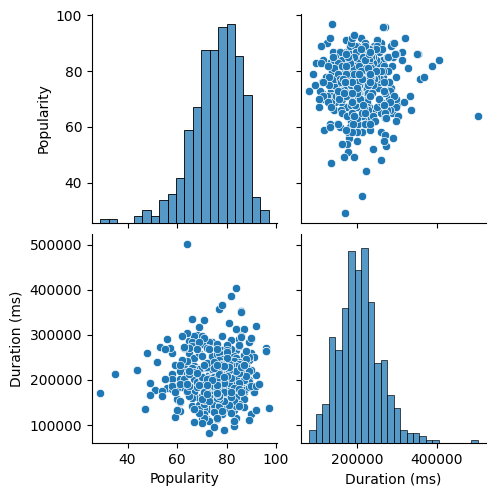

In [10]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

# Select numerical columns for the pair plot
numerical_columns = ["Popularity", "Duration (ms)"]

# Create the pair plot
sns.pairplot(df[numerical_columns])

# Show the plot
plt.show()


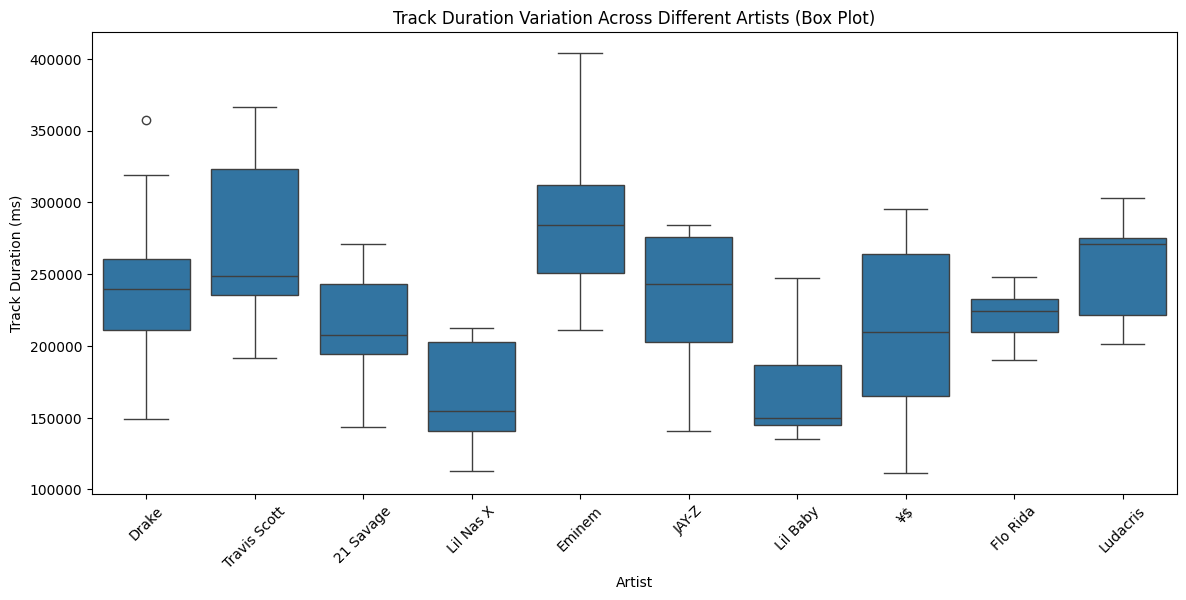

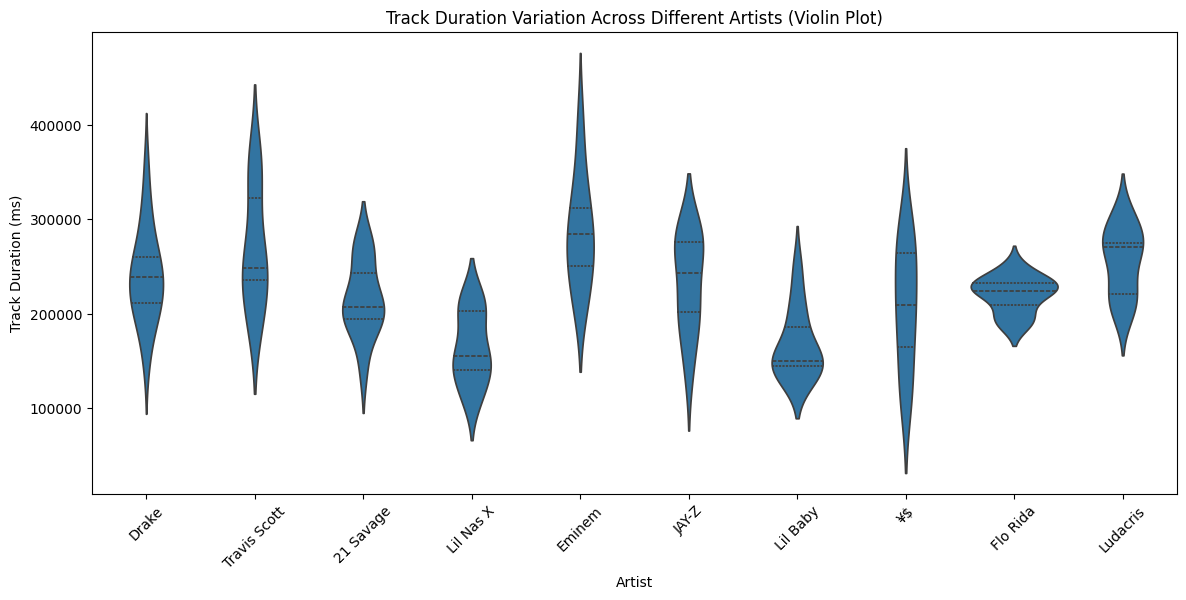

In [11]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

# Drop missing values in relevant columns
df.dropna(subset=["Artist", "Duration (ms)"], inplace=True)

# Select the top 10 artists with the most tracks for better visualization
top_10_artists = df["Artist"].value_counts().head(10).index
df_filtered = df[df["Artist"].isin(top_10_artists)]

# Set figure size
plt.figure(figsize=(14, 6))

# Create a box plot
sns.boxplot(x="Artist", y="Duration (ms)", data=df_filtered)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Artist")
plt.ylabel("Track Duration (ms)")
plt.title("Track Duration Variation Across Different Artists (Box Plot)")
plt.show()

# Create a violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(x="Artist", y="Duration (ms)", data=df_filtered, inner="quartile")
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Artist")
plt.ylabel("Track Duration (ms)")
plt.title("Track Duration Variation Across Different Artists (Violin Plot)")
plt.show()


<ipython-input-12-20b50d6afeef>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Artist", y="Popularity", data=df_filtered, inner="quartile", palette="coolwarm")


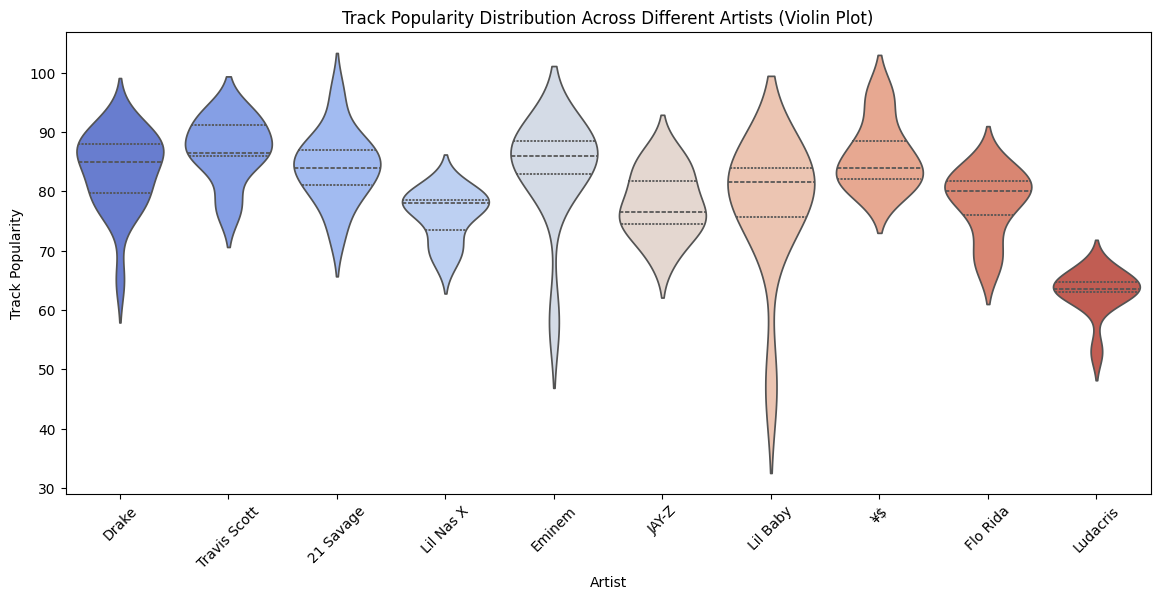

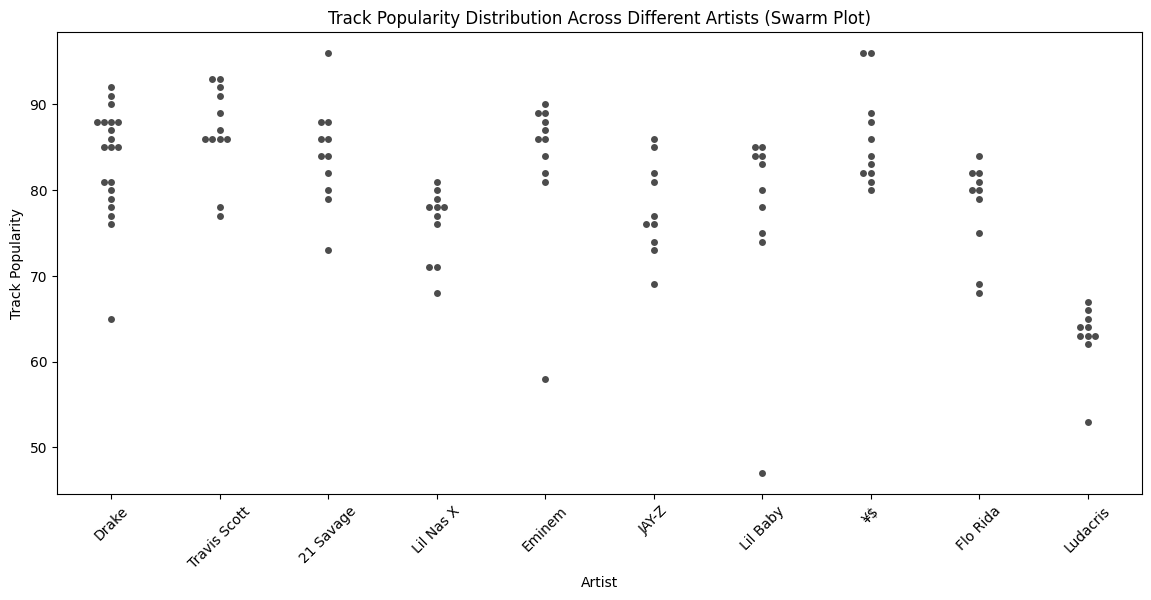

In [12]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

# Drop missing values in relevant columns
df.dropna(subset=["Artist", "Popularity"], inplace=True)

# Select the top 10 artists with the most tracks for better visualization
top_10_artists = df["Artist"].value_counts().head(10).index
df_filtered = df[df["Artist"].isin(top_10_artists)]

# Set figure size
plt.figure(figsize=(14, 6))

# Create a violin plot
sns.violinplot(x="Artist", y="Popularity", data=df_filtered, inner="quartile", palette="coolwarm")
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Artist")
plt.ylabel("Track Popularity")
plt.title("Track Popularity Distribution Across Different Artists (Violin Plot)")
plt.show()

# Create a swarm plot
plt.figure(figsize=(14, 6))
sns.swarmplot(x="Artist", y="Popularity", data=df_filtered, size=5, color="black", alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Artist")
plt.ylabel("Track Popularity")
plt.title("Track Popularity Distribution Across Different Artists (Swarm Plot)")
plt.show()
